# 1. Scrapping Data from Linkedin

In [1]:
#Importing libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import re as re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Setting keys for login
USERNAME = "emailid"
PASSWORD = "password"

#Creating lis of URL's to search
URL1 = "https://www.linkedin.com/jobs/search/?currentJobId=3366335243&geoId=101174742&keywords=software%20engineer&location=Canada&refresh=true"
URL2 = "https://www.linkedin.com/jobs/search/?currentJobId=3366707470&geoId=101174742&keywords=data%20science&location=Canada&refresh=true"
URL3 = "https://www.linkedin.com/jobs/search/?currentJobId=3341082286&geoId=101174742&keywords=machine%20learning%20co%20op&location=Canada&refresh=true"
URL5 = "https://www.linkedin.com/jobs/search/?currentJobId=3365406993&geoId=101174742&keywords=data%20analyst&location=Canada&refresh=true"
URL6 = "https://www.linkedin.com/jobs/search/?currentJobId=3158530705&geoId=101174742&keywords=data%20mining&location=Canada&refresh=true"
URL7 = "https://www.linkedin.com/jobs/search/?currentJobId=3362798673&geoId=101174742&keywords=business%20analyst&location=Canada&refresh=true"
URL8 = "https://www.linkedin.com/jobs/search/?currentJobId=3373452548&geoId=101174742&keywords=business%20intelligence&location=Canada&refresh=true"
URL9 = "https://www.linkedin.com/jobs/search/?currentJobId=3341259044&geoId=101174742&keywords=devops&location=Canada&refresh=true"
URL10 = "https://www.linkedin.com/jobs/search/?currentJobId=3376705092&geoId=101174742&keywords=nlp&location=Canada&refresh=true"
URL11 = "https://www.linkedin.com/jobs/search/?currentJobId=3373452548&geoId=101174742&keywords=computer%20vision&location=Canada&refresh=true"
URL12 = "https://www.linkedin.com/jobs/search/?currentJobId=3335330340&geoId=101174742&keywords=python%20developer&location=Canada&refresh=true"
URL13 = "https://www.linkedin.com/jobs/search/?currentJobId=3291210050&geoId=101174742&keywords=deep%20learning&location=Canada&refresh=true"
URL14 = "https://www.linkedin.com/jobs/search/?currentJobId=3158530705&geoId=101174742&keywords=tensorflow&location=Canada&refresh=true"
URL15 = "https://www.linkedin.com/jobs/search/?currentJobId=3350318652&geoId=101174742&keywords=machine%20learning&location=Canada&refresh=true"
URL16 = "https://www.linkedin.com/jobs/search/?currentJobId=3341080649&geoId=101174742&keywords=data%20visualization&location=Canada&refresh=true"
URL17 = "https://www.linkedin.com/jobs/search/?currentJobId=3282077046&geoId=101174742&keywords=internet%20of%20things&location=Canada&refresh=true"
URL18 = "https://www.linkedin.com/jobs/search/?currentJobId=3373452548&geoId=101174742&keywords=IoT&location=Canada&refresh=true"
URL19 = "https://www.linkedin.com/jobs/search/?currentJobId=3350318652&geoId=101174742&keywords=machine%20learning&location=Canada&refresh=true"

JobSearchURLs = [URL1, URL2, URL3, URL5, URL6, URL7, URL8, URL9, URL10, URL11, URL12, URL13, URL14, URL15, URL16, URL17, URL18, URL19]
# JobSearchURLs = [URL1]

#Array for storing collected links
links = []

#Crating dataframe for writing data
column_names = ['Company', 'Title', 'Location', 'Post Date', 'URL', 'Work Place Type', 'Job Type', 'Company Alumnis', 'School Alumnis', 'Applicants']
df = pd.DataFrame(columns=column_names)

In [ ]:
#Creating a web driver instance
driver = webdriver.Chrome()

## 1.1 Signing in

In [ ]:
#Opening the linkedin singin page
driver.get("https://www.linkedin.com/login")
time.sleep(3)

#Entering username and password
username = driver.find_element(By.ID, "username")
username.send_keys(USERNAME)

pword = driver.find_element(By.ID, "password")
pword.send_keys(PASSWORD)

#Clicking sign in button
driver.find_element(By.XPATH, "//button[@type='submit']").click()

#wait for 10 seconds for the page to load completely
time.sleep(10)

## 1.2 Functions to carry out operations

In [ ]:
#Function to get the links of each job offer shown by search
def getlinks(search_link):
    #Searching for job postings
    print(f"Opening the search link {search_link}")
    driver.get(search_link)
    time.sleep(3)

    #Taking total number of pages showing the results. Try cath is given if the results are shown in just one page
    #and last page element is not present
    try:
        element = driver.find_elements(By.CLASS_NAME,"artdeco-pagination__pages")
        total_pages = int(element[0].text.split('\n')[-1])
        print("Number of pages: ",total_pages)
    except:
        print("Error occured while parsing number of pages")
        total_pages = 1
        pass

    #Collecting the inks of jobs from each result page 
    for page in range(1,total_pages+1):
        print(f'Collecting the links in the page: {page}')
        
        #Selecting and clicking next page number
        driver.find_element(By.XPATH, f"//button[@aria-label='Page {page}']").click()
        time.sleep(3)

        jobs_block = driver.find_element(By.CLASS_NAME, 'scaffold-layout__list-container')
        jobs_list= jobs_block.find_elements(By.CSS_SELECTOR, '.jobs-search-results__list-item')
        
        #Collecting links from each job listed in the job block section
        for job in jobs_list:
            all_links = job.find_elements(By.TAG_NAME, 'a')
            for a in all_links:
                if str(a.get_attribute('href')).startswith("https://www.linkedin.com/jobs/view") and a.get_attribute('href') not in links: 
                    links.append(a.get_attribute('href'))

                else:
                    pass

            # scroll down for each job element just for visualization purpose
            driver.execute_script("arguments[0].scrollIntoView();", job)

    return links



#Function to collect data from given set of links
def collectingdata(links):
    
    #Collect data from the respective URL's
    c = 1
    
    for link in links:
        #Try except to skip outdated JOB URL
        try:
            driver.get(link)
            time.sleep(4)
            details = driver.find_element(By.CLASS_NAME, 'p5')

            #Default values
            company = None
            title = None
            location = None
            post_date = None
            URL = link
            work_place_type = None
            job_type = None
            com_alumnis = 0
            school_alumnis = 0
            applicants = 0

            #try-except to pass the exception in case value is missing for some tags and give nan as defauls
            #Key details
            try:
                #Getting details of the div p5
                company = details.find_element(By.CLASS_NAME, "jobs-unified-top-card__company-name").text
                title = details.find_element(By.TAG_NAME, "h1").text
                location = details.find_element(By.CLASS_NAME, "jobs-unified-top-card__bullet").text
                post_date = details.find_element(By.CLASS_NAME, "jobs-unified-top-card__posted-date").text
                URL = link

                #Taking applicants
                t = driver.find_element(By.XPATH, "/html/body/div[5]/div[3]/div/div[1]/div[1]/div/div[1]/div/div/div[1]/div[2]/ul/li[4]/span").text
                applicants = int(re.findall(r'\d+', t)[0])

                #Extracting alumnis
                text = details.find_element(By.CLASS_NAME, 'mt5.mb2').text
                text = text.split('\n')
                for t in text:
                    if re.search('alumni',t):
                        text_alumni_list = t.split("·")
                        for type in text_alumni_list:
                            if re.search("company", type):
                                com_alumnis = int(re.findall(r'\d+', type)[0])
                            if re.search("school", type):
                                school_alumnis =  int(re.findall(r'\d+', type)[0])

                #Other details
                job_type = details.find_element(By.CLASS_NAME, "jobs-unified-top-card__job-insight").text
                work_place_type = details.find_element(By.CLASS_NAME, "jobs-unified-top-card__workplace-type").text


            except:
                pass
            finally:
                #Writing to dataframe
                df.loc[len(df.index)] = [company, title, location, post_date, URL, work_place_type, job_type, com_alumnis, school_alumnis, applicants]
                
            print(f"Scrapped from link {c}")
            c = c+1
        
        except:
            pass
    
    
    return df
    

In [ ]:
#Collecting job links from all the search url's
for l in JobSearchURLs:
    links_collected = getlinks(l)

print(f'Found {str(len(links_collected))} links in total')



In [ ]:
#Total links collected
len(links_collected)

In [ ]:
#collecting data from all the links
finaldf = collectingdata(links_collected)

In [ ]:

#Added try except to pass the invalid url in the main code


#Up to 2613 collected. So skip 2614 link since the link got outdated
#collecting data from all the links (excluding 2614)
finaldf = collectingdata(links_collected[2615:])

In [ ]:
# Writing the collected data to csv file
finaldf.to_csv("linkedin_scrapped.csv",index=False)
print("Data is written to csv file.")

#  2. Data pre-processing


## 2.1. Data exploration

In [2]:
#Reading the data from csv file
sdf = pd.read_csv("linkedin_scrapped.csv")

In [3]:
#Data shape
sdf.shape

(11609, 10)

In [4]:
#Data Summary
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11609 entries, 0 to 11608
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          11607 non-null  object
 1   Title            11609 non-null  object
 2   Location         11609 non-null  object
 3   Post Date        10999 non-null  object
 4   URL              11609 non-null  object
 5   Work Place Type  6422 non-null   object
 6   Job Type         8354 non-null   object
 7   Company Alumnis  11609 non-null  int64 
 8   School Alumnis   11609 non-null  int64 
 9   Applicants       11609 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 907.1+ KB


In [5]:
#Columns in the dataset
sdf.columns

Index(['Company', 'Title', 'Location', 'Post Date', 'URL', 'Work Place Type',
       'Job Type', 'Company Alumnis', 'School Alumnis', 'Applicants'],
      dtype='object')

In [6]:
#Sample of records
sdf.head(5)

,Company,Title,Location,Post Date,URL,Work Place Type,Job Type,Company Alumnis,School Alumnis,Applicants
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,Full-time · Mid-Senior level,171,203,12
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,Hybrid,Full-time · Mid-Senior level,21,25,14
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,On-site,Full-time,1,19,5
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,NaN,Full-time,47,175,13
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,NaN,Full-time,47,175,144


In [7]:
#Statical information
sdf.describe()

,Company Alumnis,School Alumnis,Applicants
count,11609.000000,11609.000000,11609.000000
mean,65.177104,24.418899,55.468688
std,158.146080,78.831544,131.868316
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.000000,0.000000,16.000000
75%,28.000000,6.000000,58.000000
max,950.000000,451.000000,5000.000000


In [8]:
#Statistical information including mode
sdf.describe(include = 'all')

,Company,Title,Location,Post Date,URL,Work Place Type,Job Type,Company Alumnis,School Alumnis,Applicants
count,11607,11609,11609,10999,11609,6422,8354,11609.000000,11609.000000,11609.000000
unique,1541,3629,186,51,11609,3,64,NaN,NaN,NaN
top,TD,DevOps Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,Full-time · Mid-Senior level,NaN,NaN,NaN
freq,241,233,4259,2772,1,2348,2804,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.177104,24.418899,55.468688
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.146080,78.831544,131.868316
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,6.000000,58.000000


In [9]:
#Number of unique items in the column company
sdf["Company"].nunique()

1541

In [10]:
#Number of unique items in the column Title
sdf["Title"].nunique()

3629

In [11]:
#Number of unique items in the column Work Place Type
sdf["Work Place Type"].nunique()

3

In [12]:
#unique items in the column Work Place Type
sdf["Work Place Type"].unique()

array(['On-site', 'Hybrid', nan, 'Remote'], dtype=object)

In [13]:
#unique items in the column location
sdf["Location"].unique()

array(['Toronto, ON', 'Québec, QC', 'Mississauga, ON', 'Brampton, ON',
       'Markham, ON', 'Greater Quebec City Metropolitan Area',
       'Ottawa, ON', 'Calgary, AB', 'Canada', 'Burnaby, BC',
       'North Gower, ON', 'North Vancouver, BC', 'St John’s, NL',
       'Fredericton, NB', 'Whitchurch-Stouffville, ON', 'Edmonton, AB',
       'London, ON', 'St-Hyacinthe, QC', 'Oakville, ON',
       'Ontario, Canada', 'Vancouver, BC', 'Greater Toronto Area, Canada',
       'Richmond, BC', 'Montreal, QC', 'Halifax, NS', 'Pickering, ON',
       'Hamilton, ON', 'Richmond Hill, ON', 'Alberta, Canada',
       'Kanata, ON', 'York, ON', 'Waterloo, ON', 'Manitoba, Canada',
       'Winnipeg, MB', 'Hastings Highlands, ON', 'North York, ON',
       'Greater Montreal Metropolitan Area', 'Ajax, ON',
       'Greater Vancouver Metropolitan Area', 'Saint John, NB',
       'Kingston, ON', 'Charlottetown, PE', 'Moncton, NB', 'Surrey, BC',
       'Etobicoke, ON', 'Shawinigan, QC', 'Victoria, BC', 'Longueuil, Q

In [14]:
#Number of unique items in the column Job Type
sdf["Job Type"].nunique()

64

In [15]:
#Correlation between columns
sdf.corr()

,Company Alumnis,School Alumnis,Applicants
Company Alumnis,1.000000,0.144937,0.018180
School Alumnis,0.144937,1.000000,0.015888
Applicants,0.018180,0.015888,1.000000


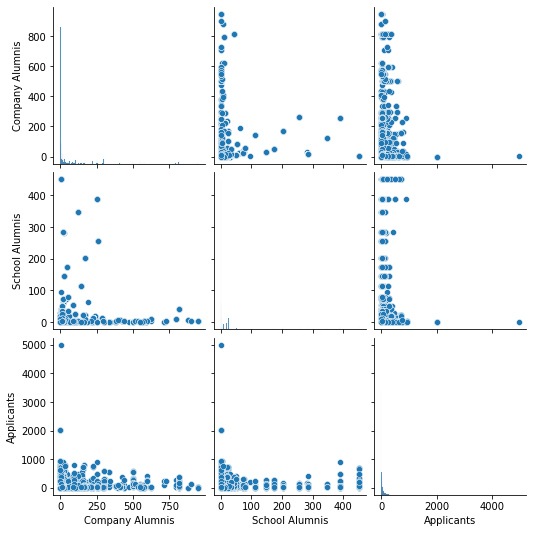

In [16]:
#Pairplot between columns
sns.pairplot(sdf)

<AxesSubplot:>

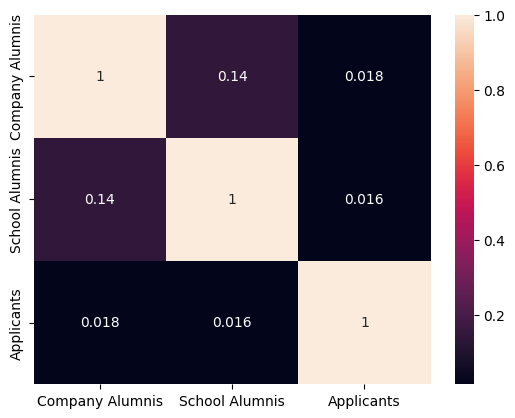

In [17]:
#HeatMap to show the correlation between columns
sns.heatmap(sdf.corr(), annot=True)

## 2.2. Dealing with null values

In [18]:
#Check for null values
sdf.isnull().sum()

Company               2
Title                 0
Location              0
Post Date           610
URL                   0
Work Place Type    5187
Job Type           3255
Company Alumnis       0
School Alumnis        0
Applicants            0
dtype: int64

In [19]:
#Dropping rows where 'company column has null values'
sdf.dropna(how="any", subset=["Company"], inplace = True)

In [20]:
#Replacing issing values in 'Work Place Type , 'Post Date', and 'Job Type' with missing
sdf["Post Date"].fillna("Missing",inplace=True)
sdf["Work Place Type"].fillna("Missing",inplace=True)
sdf["Job Type"].fillna("Missing",inplace=True)

In [21]:
#Check for null values
sdf.isnull().sum()

Company            0
Title              0
Location           0
Post Date          0
URL                0
Work Place Type    0
Job Type           0
Company Alumnis    0
School Alumnis     0
Applicants         0
dtype: int64

## 2.3. Dealing with zeros

In [22]:
#Check for zeros
(sdf==0).sum()

Company               0
Title                 0
Location              0
Post Date             0
URL                   0
Work Place Type       0
Job Type              0
Company Alumnis    3807
School Alumnis     5823
Applicants         3254
dtype: int64

Zero present in theses columns are valid, so we willleave them as it is.

## 2.4. Dealing with duplicates

In [23]:
#Checking duplicate rows
sdf[sdf.duplicated()]

,Company,Title,Location,Post Date,URL,Work Place Type,Job Type,Company Alumnis,School Alumnis,Applicants


There are no duplicate values.

## 2.5. Deaing with invalid values in category column

NAMER is an invalid string. We will replace it with string "Unknown".

In [24]:
#Replacing NAMER with Unknown in the column Location
sdf["Location"].replace("NAMER", "Unknown",inplace=True)

## 2.6. Adding new column as "Total Alumnis"

In [25]:
#Creating new column Total Alumnis
sdf["Total Alumnis"] = sdf["Company Alumnis"] + sdf["School Alumnis"]

In [26]:
sdf.head()

,Company,Title,Location,Post Date,URL,Work Place Type,Job Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,Full-time · Mid-Senior level,171,203,12,374
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,Hybrid,Full-time · Mid-Senior level,21,25,14,46
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,On-site,Full-time,1,19,5,20
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,Missing,Full-time,47,175,13,222
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,Missing,Full-time,47,175,144,222


## 2.7. Adding new column Province

In [27]:
#Extracting Province
province_code = ["AB", "BC", "MB", "NB", "NL", "NT", "NS", "NU", "ON", "PE", "QC", "SK", "YT"]
ON_Ter = ["Ontario", "Greater Toronto Area", "Toronto", "Vaughan", "Ottawa", "Six Nations (Part) 40", "Greater Kitchener-Cambridge-Waterloo Metropolitan Area", "Greater Ottawa Metropolitan Area"]
QC_Ter = ["Quebec", "Greater Montreal Metropolitan Area", "Montreal", "Greater Quebec City Metropolitan Area"]
AB_Ter = ["Alberta", "Edmonton", "Greater Edmonton Metropolitan Area", "Greater Calgary Metropolitan Area"]
BC_Ter = ["British Columbia", "Greater Vancouver Metropolitan Area"]
MB_Ter = ["Manitoba", "Greater Winnipeg Metropolitan Area"]
NS_Ter = ["Greater Halifax Metropolitan Area", "Cape Breton", "Nova Scotia"]
SK_Ter = ["Saskatchewan"]
NB_Ter = ["New Brunswick"]
PE_Ter = ["Prince Edward Island"]
NL_Ter = ["Newfoundland and Labrador"]

#New list to store the values for new column
province = []
#Taking each row value of province
for p in sdf["Location"]:
    x = p.split(",")
    #write status of each row
    flag = 0
    #Adding Province code if it is present in the row text
    for i in x:
        i = i.strip()
        if flag==0:
            if i in province_code:
                province.append(i)
                flag = 1
                break
    #Checking other words present in the given row if province code not present -Ontario
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in ON_Ter:
                    province.append("ON")
                    flag = 1
                    break
                    
    #Checking other words present in the given row if province code not present -Quebec
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in QC_Ter:
                    province.append("QC")
                    flag = 1
                    break     
                    
    #Checking other words present in the given row if province code not present -Alberta
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in AB_Ter:
                    province.append("AB")
                    flag = 1
                    break
    #Checking other words present in the given row if province code not present -Alberta
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in BC_Ter:
                    province.append("BC")
                    flag = 1
                    break
    #Checking other words present in the given row if province code not present -Manitoba
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in MB_Ter:
                    province.append("MB")
                    flag = 1
                    break
    #Checking other words present in the given row if province code not present -Saskechwan
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in SK_Ter:
                    province.append("SK")
                    flag = 1
                    break
    #Checking other words present in the given row if province code not present -New Brunswick
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in NB_Ter:
                    province.append("NB")
                    flag = 1
                    break
    #Checking other words present in the given row if province code not present -Prince Edward Island
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in PE_Ter:
                    province.append("PE")
                    flag = 1
                    break
                    
    #Checking other words present in the given row if province code not present -New Found Land and Labrador
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in NL_Ter:
                    province.append("NL")
                    flag = 1
                    break
    #Checking other words present in the given row if province code not present -New Found Land and Labrador
    if flag == 0:
        for i in x:
            i = i.strip()
            if flag==0:
                if i in NS_Ter:
                    province.append("NS")
                    flag = 1
                    break
                    
    #Inserting the same value in the row if nothing satisfied
    if flag == 0:
        province.append(p)


        
len(province)

11607

In [28]:
#Adding Province column into dataframe
sdf["Province"] = province
sdf["Province"].value_counts()

ON               7528
QC               1244
BC               1087
Canada            700
AB                594
NS                198
MB                 97
NB                 77
SK                 30
PE                 17
NL                 15
Unknown            14
NT                  3
United States       2
NU                  1
Name: Province, dtype: int64

## 2.8. Adding new column 'Type of Job' from 'Job Type'

In [29]:
#Job Type = Full-time, Temporary, Contract,Internship, Part-time

In [30]:
#Type of jobs present in the data
job_types = ["Full-time", "Temporary", "Contract", "Internship", "Part-time", "Missing"]
#List for storing new values for the new column
type_of_job = []
for j in sdf["Job Type"]:
    flag = 0
    for jb in job_types:
        if flag == 0:
            if jb in j:
                type_of_job.append(jb)
                flag = 1
                break
    if flag == 0:
        type_of_job.append("Missing")
            

In [31]:
#Adding to the dataframe
sdf["Type of Job"] = type_of_job

In [32]:
sdf["Type of Job"].value_counts()

Full-time     7888
Missing       3293
Contract       290
Internship      70
Temporary       48
Part-time       18
Name: Type of Job, dtype: int64

## 2.9. Adding new column 'Job level' from 'Job Type'

In [33]:
#Job Level = Mid-Senior level, Entry level, Executive, Associate

In [34]:
#Type of Job Level present in the data
job_level = ["Mid-Senior level", "Entry level", "Executive", "Associate", "Missing"]
#List for storing new values for the new column
type_of_level = []
for j in sdf["Job Type"]:
    flag = 0
    for jl in job_level:
        if flag == 0:
            if jl in j:
                type_of_level.append(jl)
                flag = 1
                break
    if flag == 0:
        type_of_level.append("Missing")

In [35]:
# Adding to the dataframe
sdf["Type of Level"] = type_of_level

In [36]:
sdf["Type of Level"].value_counts()

Missing             6076
Mid-Senior level    3072
Entry level         1896
Associate            557
Executive              6
Name: Type of Level, dtype: int64

## 2.10. Removing column Job Type since its redundant

In [37]:
#Removing redundant feature column
sdf.drop(['Job Type'], axis = 1, inplace=True)

In [38]:
#Top 10 elements
sdf.head(10)

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,171,203,12,374,ON,Full-time,Mid-Senior level
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,Hybrid,21,25,14,46,QC,Full-time,Mid-Senior level
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,On-site,1,19,5,20,ON,Full-time,Missing
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,Missing,47,175,13,222,ON,Full-time,Missing
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,Missing,47,175,144,222,ON,Full-time,Missing
5,Laserax,Technicien(ne) ingénierie système,Greater Quebec City Metropolitan Area,1 week ago,https://www.linkedin.com/jobs/view/3366638988/...,Missing,0,0,0,0,QC,Missing,Missing
6,TD,IT Developer III,"Toronto, ON",22 minutes ago,https://www.linkedin.com/jobs/view/3339956921/...,Missing,255,389,26,644,ON,Full-time,Missing
7,RBC,Senior Site Reliability Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3367214404/...,Missing,260,256,15,516,ON,Full-time,Missing
8,Mimecast,Senior Site Reliability Engineer,"Mississauga, ON",1 week ago,https://www.linkedin.com/jobs/view/3374474962/...,Hybrid,6,0,27,6,ON,Full-time,Mid-Senior level
9,Kinaxis,"Staff Cloud Developer, SecOps","Ottawa, ON",1 week ago,https://www.linkedin.com/jobs/view/3373765465/...,Missing,0,0,0,0,ON,Missing,Missing


In [39]:
#Check for null values
sdf.isnull().sum()

Company            0
Title              0
Location           0
Post Date          0
URL                0
Work Place Type    0
Company Alumnis    0
School Alumnis     0
Applicants         0
Total Alumnis      0
Province           0
Type of Job        0
Type of Level      0
dtype: int64

## 2.11. Central Tendency and Dispersion

In [40]:
#Statistical information
sdf.describe(include='all')

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level
count,11607,11607,11607,11607,11607,11607,11607.000000,11607.000000,11607.00000,11607.000000,11607,11607,11607
unique,1541,3628,186,52,11607,4,NaN,NaN,NaN,NaN,15,6,5
top,TD,DevOps Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3326598427/...,Missing,NaN,NaN,NaN,NaN,ON,Full-time,Missing
freq,241,233,4259,2772,1,5186,NaN,NaN,NaN,NaN,7528,7888,6076
mean,NaN,NaN,NaN,NaN,NaN,NaN,65.187990,24.422762,55.47704,89.610752,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,158.157529,78.837782,131.87811,186.663207,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,16.00000,7.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,6.000000,58.00000,55.000000,NaN,NaN,NaN


In [41]:
#Mean of each numerical column
sdf.mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10132\2892305597.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sdf.mean()


Company Alumnis    65.187990
School Alumnis     24.422762
Applicants         55.477040
Total Alumnis      89.610752
dtype: float64

Median represents the 50th percentile, or the middle value of the data, that separates the distribution into two halves.

In [42]:
#Median of each numerical column
sdf.median()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10132\1696748709.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sdf.median()


Company Alumnis     3.0
School Alumnis      0.0
Applicants         16.0
Total Alumnis       7.0
dtype: float64

Mode represents the most frequent value of a variable in the data. This is the only central tendency measure that can be used with categorical variables, unlike the mean and the median which can be used only with quantitative data.

In [43]:
#Mode of each column
sdf.mode()

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level
0,TD,DevOps Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/2227911311/...,Missing,0.0,0.0,0.0,0.0,ON,Full-time,Missing
1,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/2348989873/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/2538426591/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/2538426591/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/2626624762/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3383389035/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11603,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3383389045/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11604,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3383389053/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11605,NaN,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3383389058/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Standard deviation is a measure that is used to quantify the amount of variation of a set of data values from its mean. A low standard deviation for a variable indicates that the data points tend to be close to its mean, and vice versa

In [45]:
#Standard Deviation of each numerical column
sdf.std()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10132\2030134475.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sdf.std()


Company Alumnis    158.157529
School Alumnis      78.837782
Applicants         131.878110
Total Alumnis      186.663207
dtype: float64

Variance is another measure of dispersion. It is the square of the standard deviation and the covariance of the random variable with itself.

In [46]:
#Variance of each numerical column
sdf.var()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10132\521672012.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sdf.var()


Company Alumnis    25013.803878
School Alumnis      6215.395873
Applicants         17391.835915
Total Alumnis      34843.152971
dtype: float64

The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile). The IQR is also a very important measure for identifying outliers and could be visualized using a boxplot.

In [47]:
#Taking all the numerical data into a dataframe
dfnum = sdf.select_dtypes(include = "number")
dfnum.head()

,Company Alumnis,School Alumnis,Applicants,Total Alumnis
0,171,203,12,374
1,21,25,14,46
2,1,19,5,20
3,47,175,13,222
4,47,175,144,222


Although these are valid data, lets look at what rows are shown as outliers.

In [48]:
#Applicants Outliers details
print("Information on Applicants")
Q1 = dfnum["Applicants"].quantile(.25)
Q3 = dfnum["Applicants"].quantile(.75)
IQR = Q3 - Q1
print(f"IQR is {IQR}")
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print(f"Upper whisker is {UW} and lower whisker is {LW}")

outliers = dfnum[((dfnum["Applicants"]<LW)|(dfnum["Applicants"]>UW))]
outliers.shape

Information on Applicants
IQR is 58.0
Upper whisker is 145.0 and lower whisker is -87.0


(1167, 4)

In [49]:
sdf[sdf["Applicants"]<0]

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level


In [50]:
#Total Alumnis Outliers details
print("Information on Total Alumnis")
Q1 = dfnum["Total Alumnis"].quantile(.25)
Q3 = dfnum["Total Alumnis"].quantile(.75)
IQR = Q3 - Q1
print(f"IQR is {IQR}")
#Calculating Upper Whisker and Lower Whisker
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print(f"Upper whisker is {UW} and lower whisker is {LW}")

outliers = dfnum[((dfnum["Total Alumnis"]<LW)|(dfnum["Total Alumnis"]>UW))]
outliers.shape

Information on Total Alumnis
IQR is 55.0
Upper whisker is 137.5 and lower whisker is -82.5


(1972, 4)

In [51]:
sdf[sdf["Total Alumnis"]<0]

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level


In [52]:
#Company Alumnis Outliers details
print("Information on Company Alumnis")
Q1 = dfnum["Company Alumnis"].quantile(.25)
Q3 = dfnum["Company Alumnis"].quantile(.75)
IQR = Q3 - Q1
print(f"IQR is {IQR}")
#Calculating Upper Whisker and Lower Whisker
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print(f"Upper whisker is {UW} and lower whisker is {LW}")

outliers = dfnum[((dfnum["Company Alumnis"]<LW)|(dfnum["Company Alumnis"]>UW))]
outliers.shape

Information on Company Alumnis
IQR is 28.0
Upper whisker is 70.0 and lower whisker is -42.0


(2180, 4)

In [53]:
sdf[sdf["Company Alumnis"]<0]

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level


In [54]:
#School Alumnis Outliers details
print("Information on School Alumnis")
Q1 = dfnum["School Alumnis"].quantile(.25)
Q3 = dfnum["School Alumnis"].quantile(.75)
IQR = Q3 - Q1
print(f"IQR is {IQR}")
#Calculating Upper Whisker and Lower Whisker
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print(f"Upper whisker is {UW} and lower whisker is {LW}")

outliers = dfnum[((dfnum["School Alumnis"]<LW)|(dfnum["School Alumnis"]>UW))]
outliers.shape

Information on School Alumnis
IQR is 6.0
Upper whisker is 15.0 and lower whisker is -9.0


(2267, 4)

In [55]:
sdf[sdf["School Alumnis"]<0]

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level


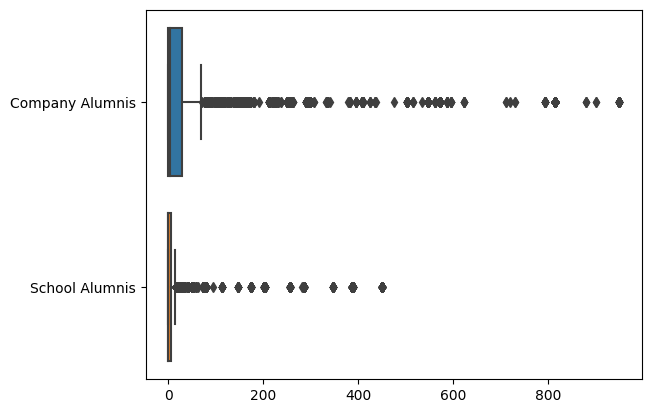

In [56]:
#data distribution of city mpg and hoghway mpg
on = sns.boxplot(data = sdf[["Company Alumnis","School Alumnis"]], orient = 'h')


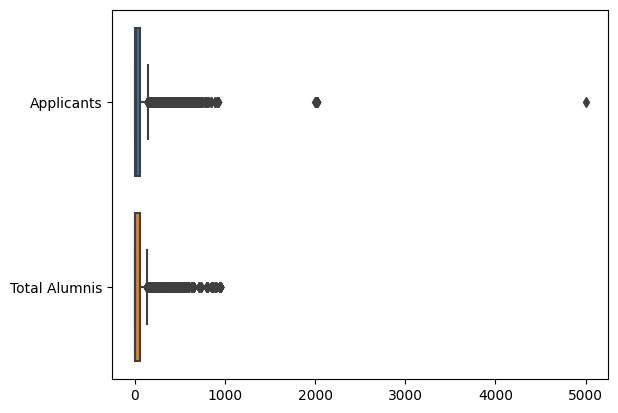

In [57]:
#data distribution of "Applicants" and "Total Alumnis"
on = sns.boxplot(data = sdf[["Applicants","Total Alumnis"]], orient = 'h')

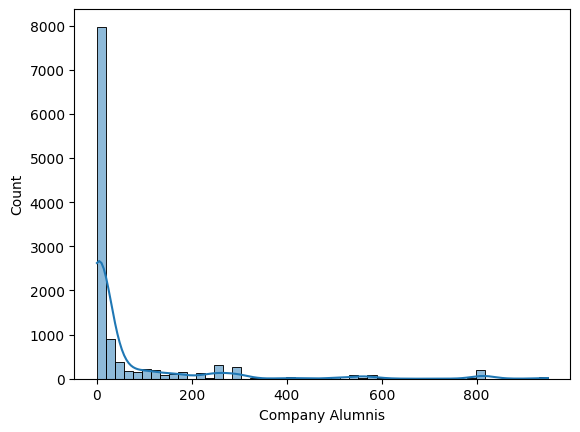

In [58]:
#Distribution of values of "Company Alumnis"
on = sns.histplot(data= sdf["Company Alumnis"], bins=50, kde= True)

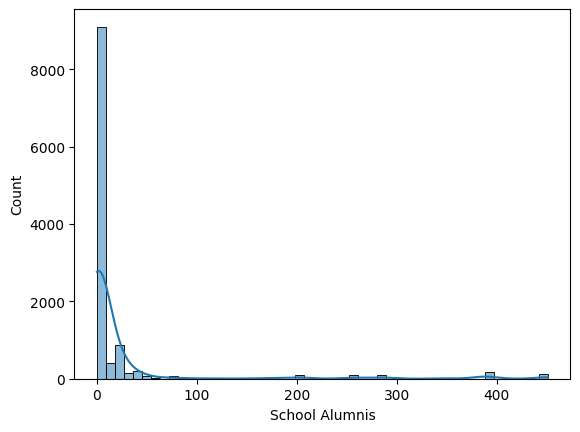

In [59]:
#Distribution of values of "School Alumnis"
on = sns.histplot(data= sdf["School Alumnis"], bins=50, kde= True)

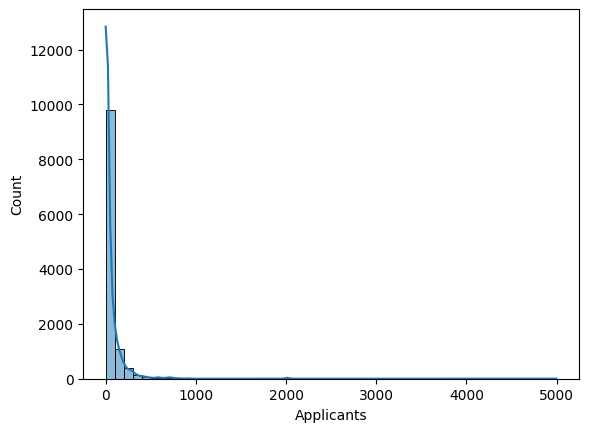

In [60]:
#Distribution of values of "Applicants"
on = sns.histplot(data= sdf["Applicants"], bins=50, kde= True)

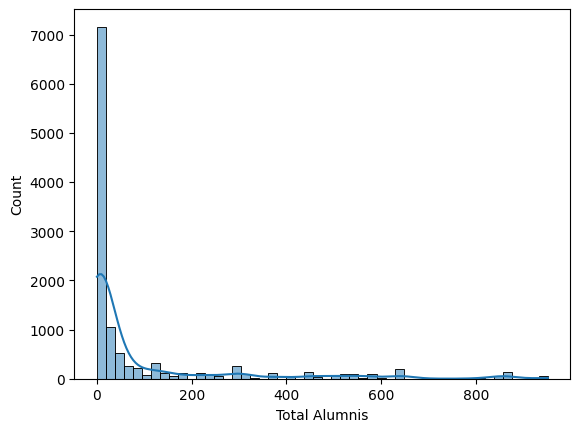

In [61]:
#Distribution of values of "Total Alumnis"
on = sns.histplot(data= sdf["Total Alumnis"], bins=50, kde= True)

Skewness is the measure of the symmetry, or lack of it, for a real-valued random variable about its mean. 

In [62]:
#Skewness
sdf.select_dtypes(include="number").skew()

Company Alumnis     3.475850
School Alumnis      4.083934
Applicants         11.115037
Total Alumnis       2.660420
dtype: float64

Here, we have positive skewness. Skewness will give an idea of direction of outiers.

We will keep the data as it is since they are not invalid and directly taken from the job description

# 3.0. Visualization

## 3.1. Heatmap

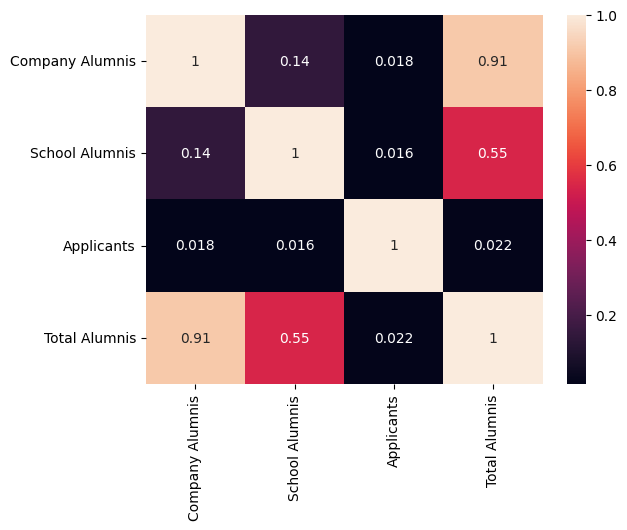

In [63]:
#Heatmap
on = sns.heatmap(sdf.select_dtypes(include="number").corr(), annot = True)

## 3.2. Bar Graph and Pie Graph

### 3.2.1. Company Alumnis in Each province

In [64]:
ca = sdf[["Company Alumnis", "Province"]].groupby(by="Province").sum()
ca

,Company Alumnis
Province,
AB,26702
BC,64458
Canada,8701
MB,4529
NB,549
NL,303
NS,26370
NT,5
NU,4


<AxesSubplot:title={'center':'Count of Company Alumnis in Each Province'}, xlabel='Province', ylabel='Company Alumnis'>

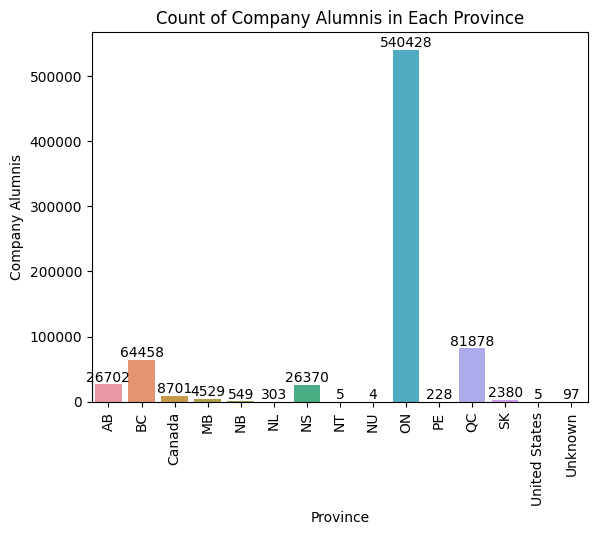

In [65]:
fig = sns.barplot(data=ca, x=ca.index, y="Company Alumnis")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.bar_label(fig.containers[0])
fig.set_title("Count of Company Alumnis in Each Province")
fig

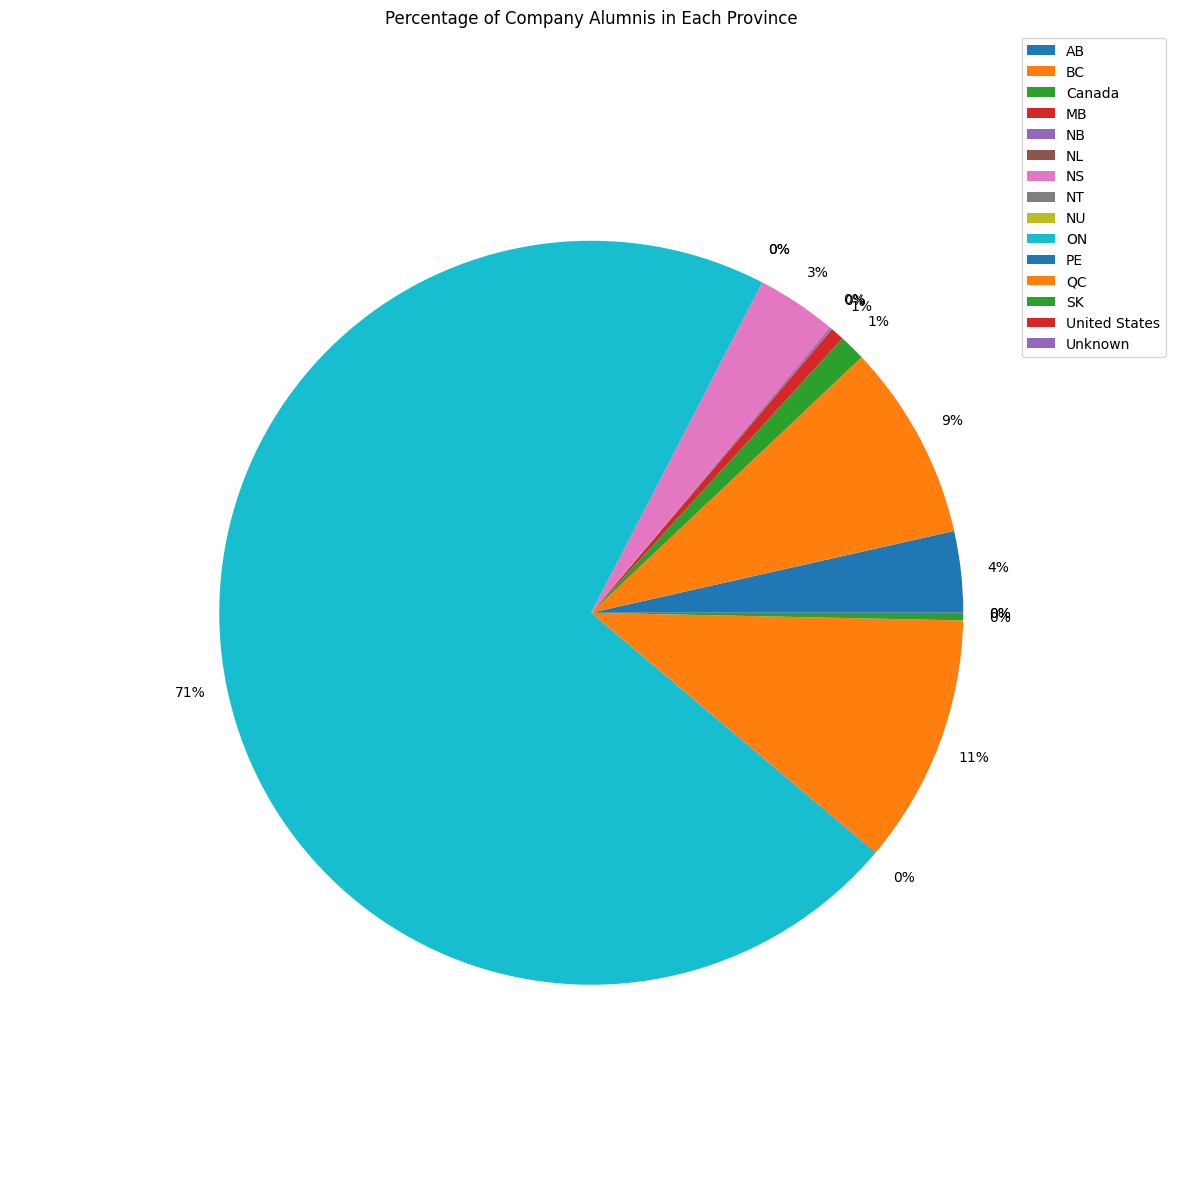

In [66]:
plt.rcParams["figure.figsize"] = (15,20)
piechart = plt.pie(ca["Company Alumnis"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(ca.index, loc = "upper right")
plt.title("Percentage of Company Alumnis in Each Province")
plt.show()

### 3.2.2. School Alumnis in Each province

In [67]:
ca = sdf[["School Alumnis", "Province"]].groupby(by="Province").sum()
ca

,School Alumnis
Province,
AB,4697
BC,24458
Canada,1171
MB,327
NB,388
NL,259
NS,2924
NT,5
NU,2


<AxesSubplot:title={'center':'Count of School Alumnis in Each Province'}, xlabel='Province', ylabel='School Alumnis'>

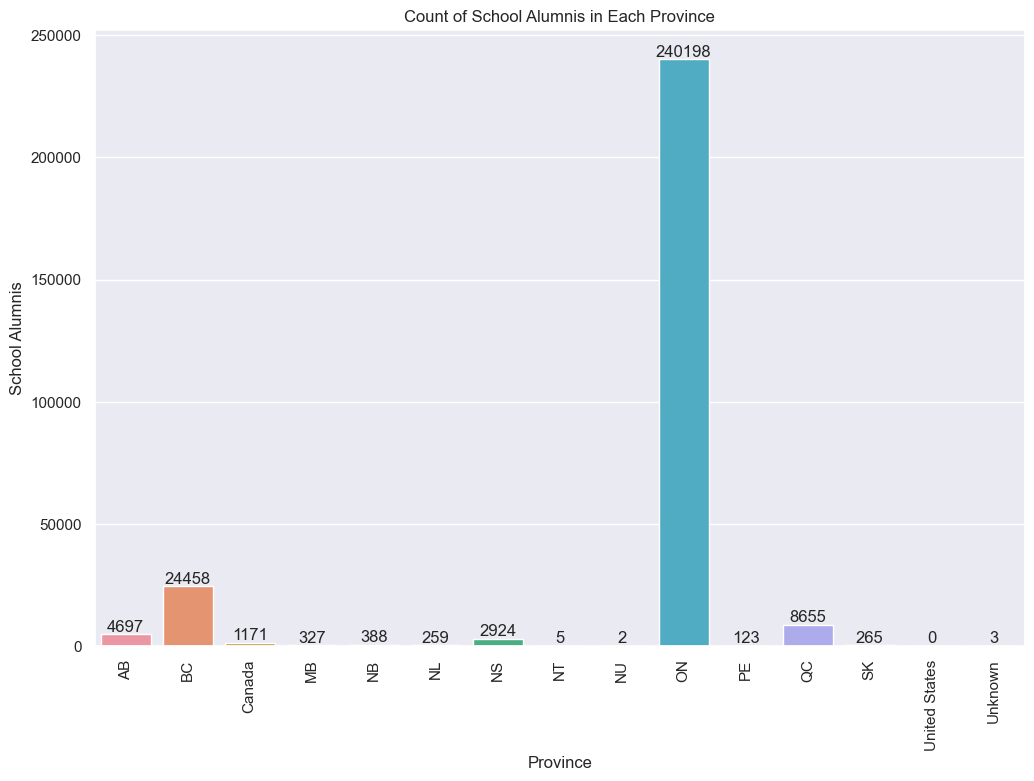

In [68]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.barplot(data=ca, x=ca.index, y="School Alumnis")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.bar_label(fig.containers[0])
fig.set_title("Count of School Alumnis in Each Province")
fig

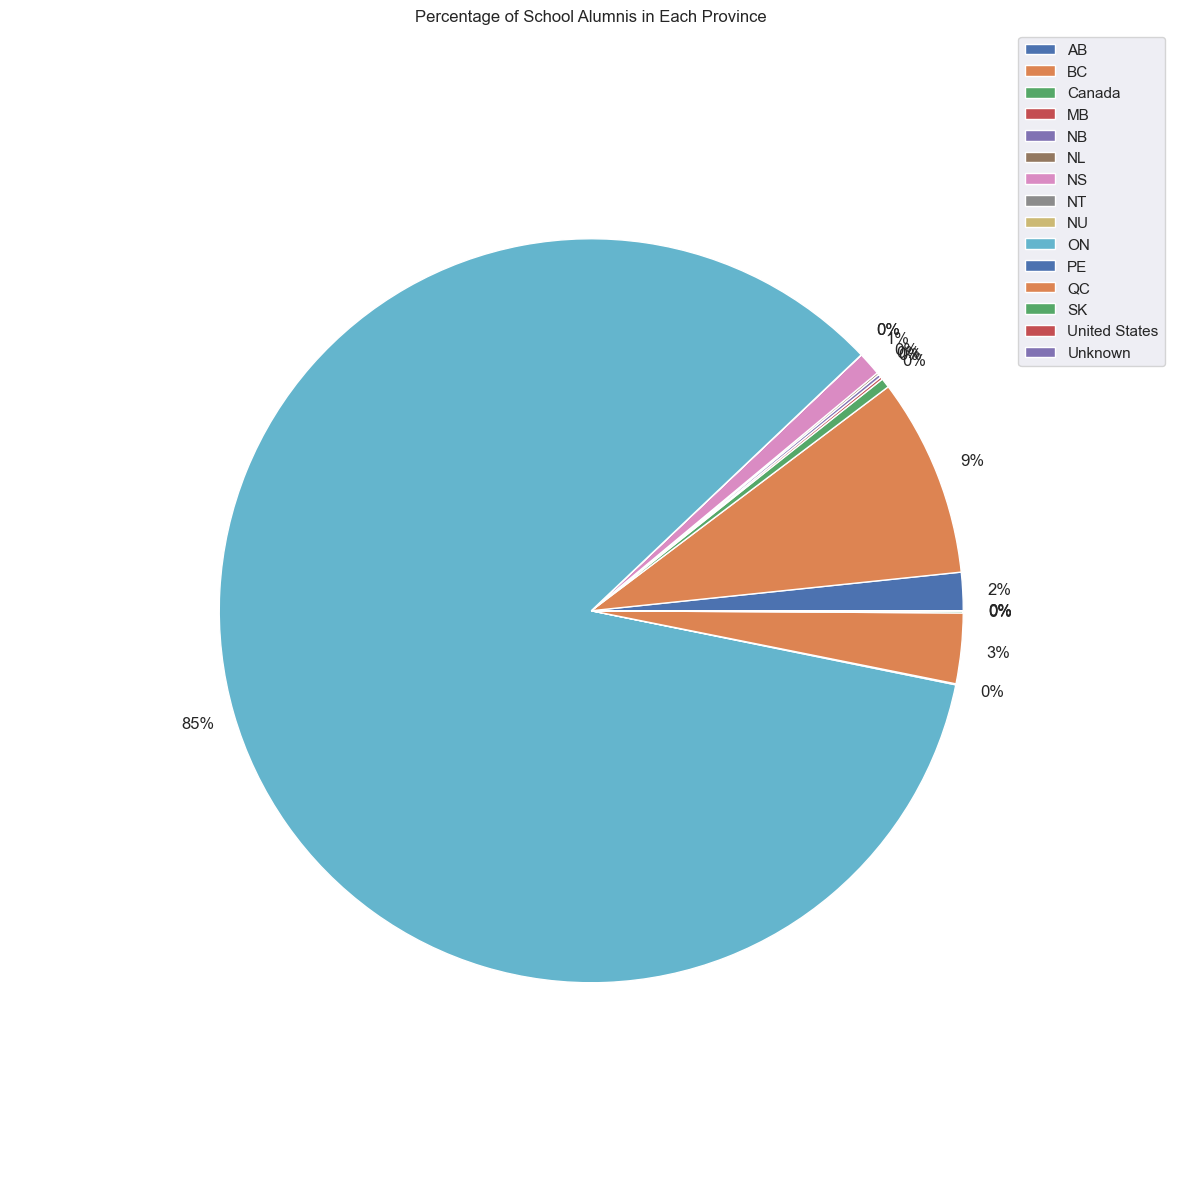

In [69]:
plt.rcParams["figure.figsize"] = (15,20)
piechart = plt.pie(ca["School Alumnis"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(ca.index, loc = "upper right")
plt.title("Percentage of School Alumnis in Each Province")
plt.show()

### 3.2.3. Total Alumnis in Each province

In [70]:
ca = sdf[["Total Alumnis", "Province"]].groupby(by="Province").sum()
ca

,Total Alumnis
Province,
AB,31399
BC,88916
Canada,9872
MB,4856
NB,937
NL,562
NS,29294
NT,10
NU,6


<AxesSubplot:title={'center':'Count of Total Alumnis in Each Province'}, xlabel='Province', ylabel='Total Alumnis'>

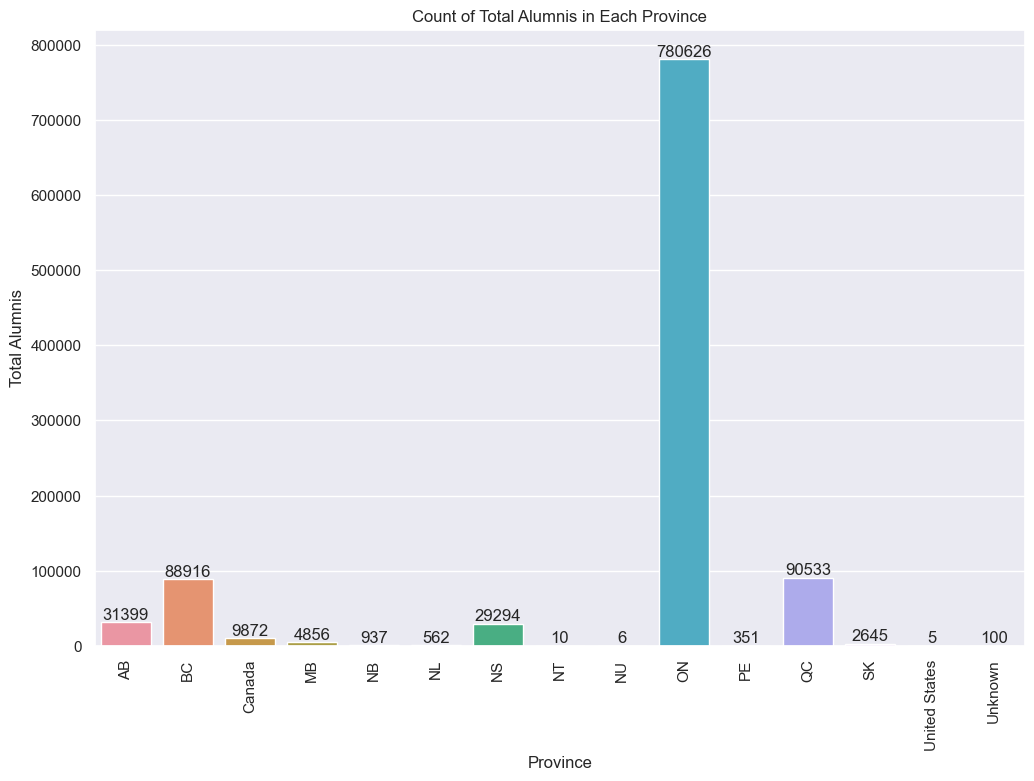

In [71]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.barplot(data=ca, x=ca.index, y="Total Alumnis")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.bar_label(fig.containers[0])
fig.set_title("Count of Total Alumnis in Each Province")
fig

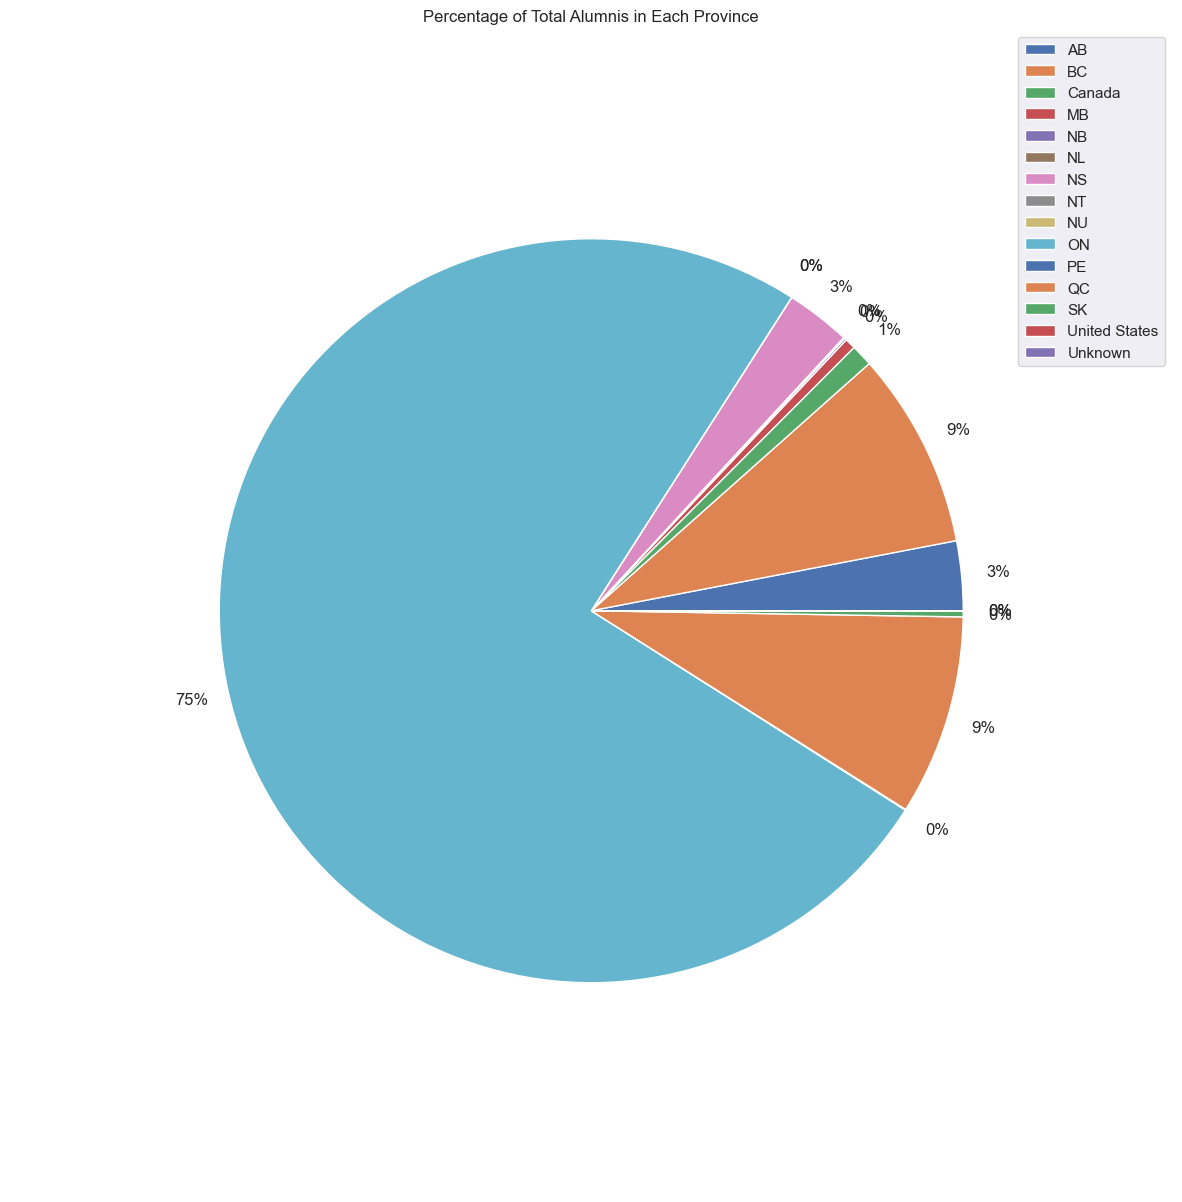

In [72]:
plt.rcParams["figure.figsize"] = (15,20)
piechart = plt.pie(ca["Total Alumnis"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(ca.index, loc = "upper right")
plt.title("Percentage of Total Alumnis in Each Province")
plt.show()

### 3.2.4. Number of Applicants in Each province

In [73]:
ca = sdf[["Applicants", "Province"]].groupby(by="Province").sum()
ca

,Applicants
Province,
AB,31454
BC,63457
Canada,51296
MB,1961
NB,1240
NL,181
NS,6068
NT,35
NU,16


<AxesSubplot:title={'center':'Count of Applicantsin Each Province'}, xlabel='Province', ylabel='Applicants'>

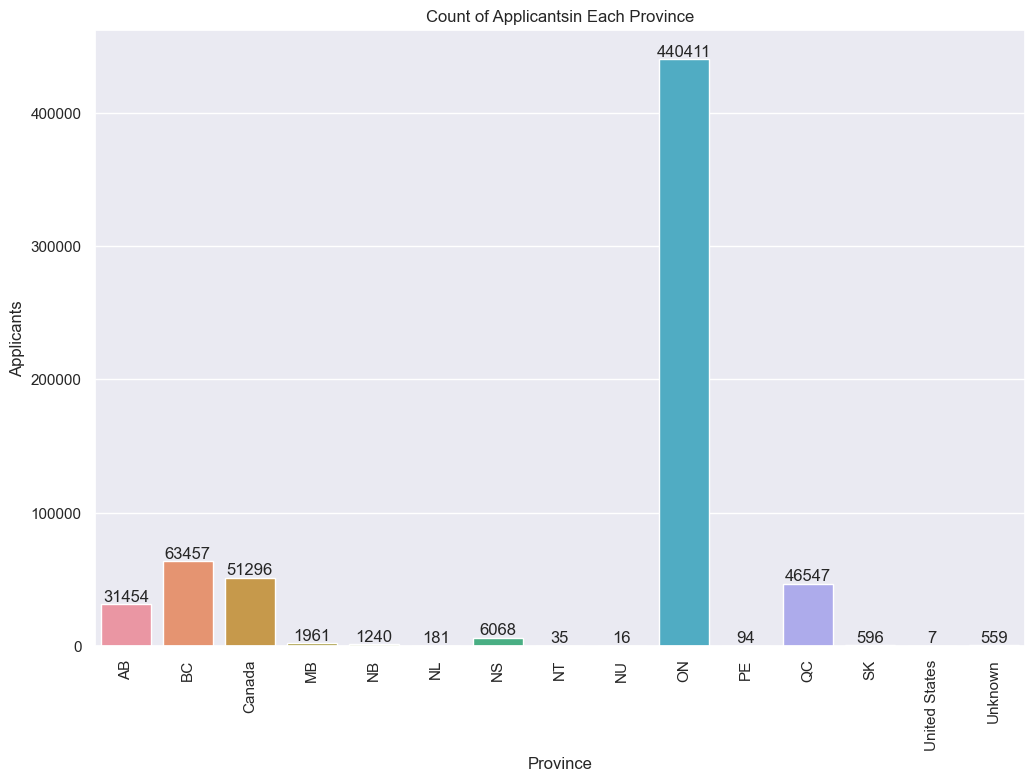

In [74]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.barplot(data=ca, x=ca.index, y="Applicants")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.bar_label(fig.containers[0])
fig.set_title("Count of Applicantsin Each Province")
fig

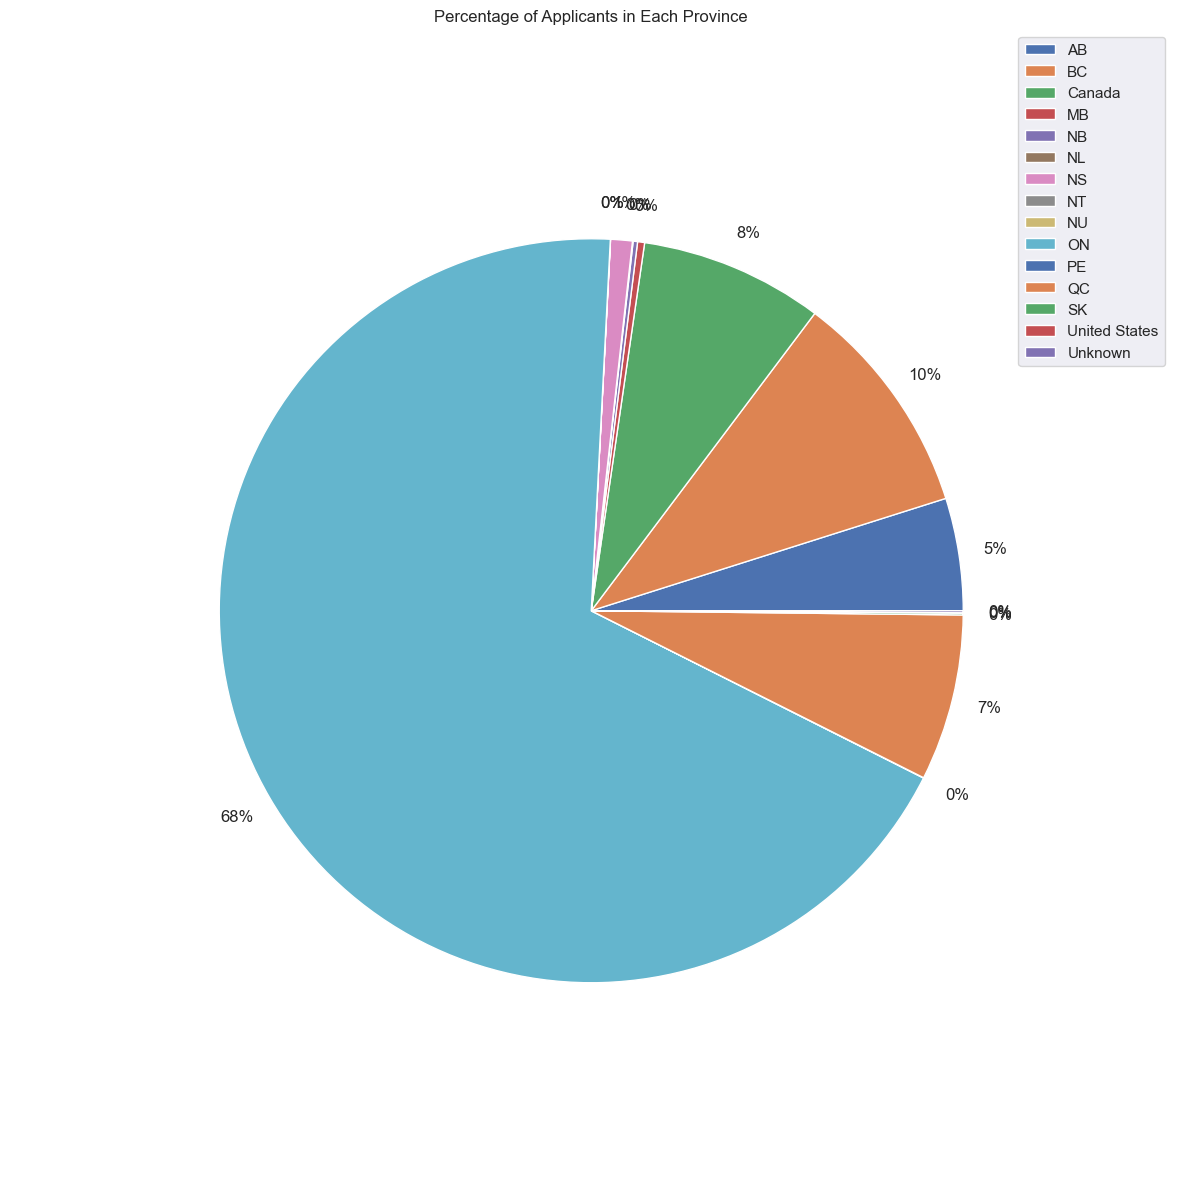

In [75]:
plt.rcParams["figure.figsize"] = (15,20)
piechart = plt.pie(ca["Applicants"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(ca.index, loc = "upper right")
plt.title("Percentage of Applicants in Each Province")
plt.show()

### 3.2.5. Number of offers in Each province

In [76]:
ca = pd.DataFrame(sdf["Province"].value_counts())
ca

,Province
ON,7528
QC,1244
BC,1087
Canada,700
AB,594
NS,198
MB,97
NB,77
SK,30
PE,17


<AxesSubplot:title={'center':'Count of Number of Offers in Each Province'}, ylabel='Province'>

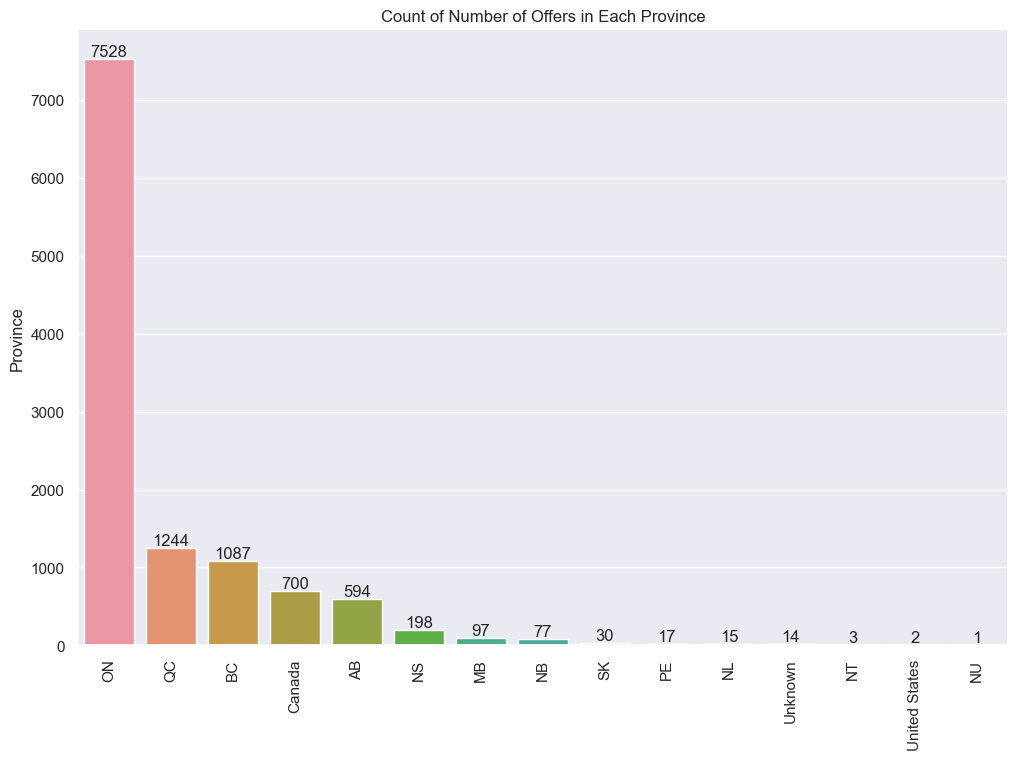

In [77]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.barplot(data=ca, x=ca.index, y=ca["Province"])
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.bar_label(fig.containers[0])
fig.set_title("Count of Number of Offers in Each Province")
fig

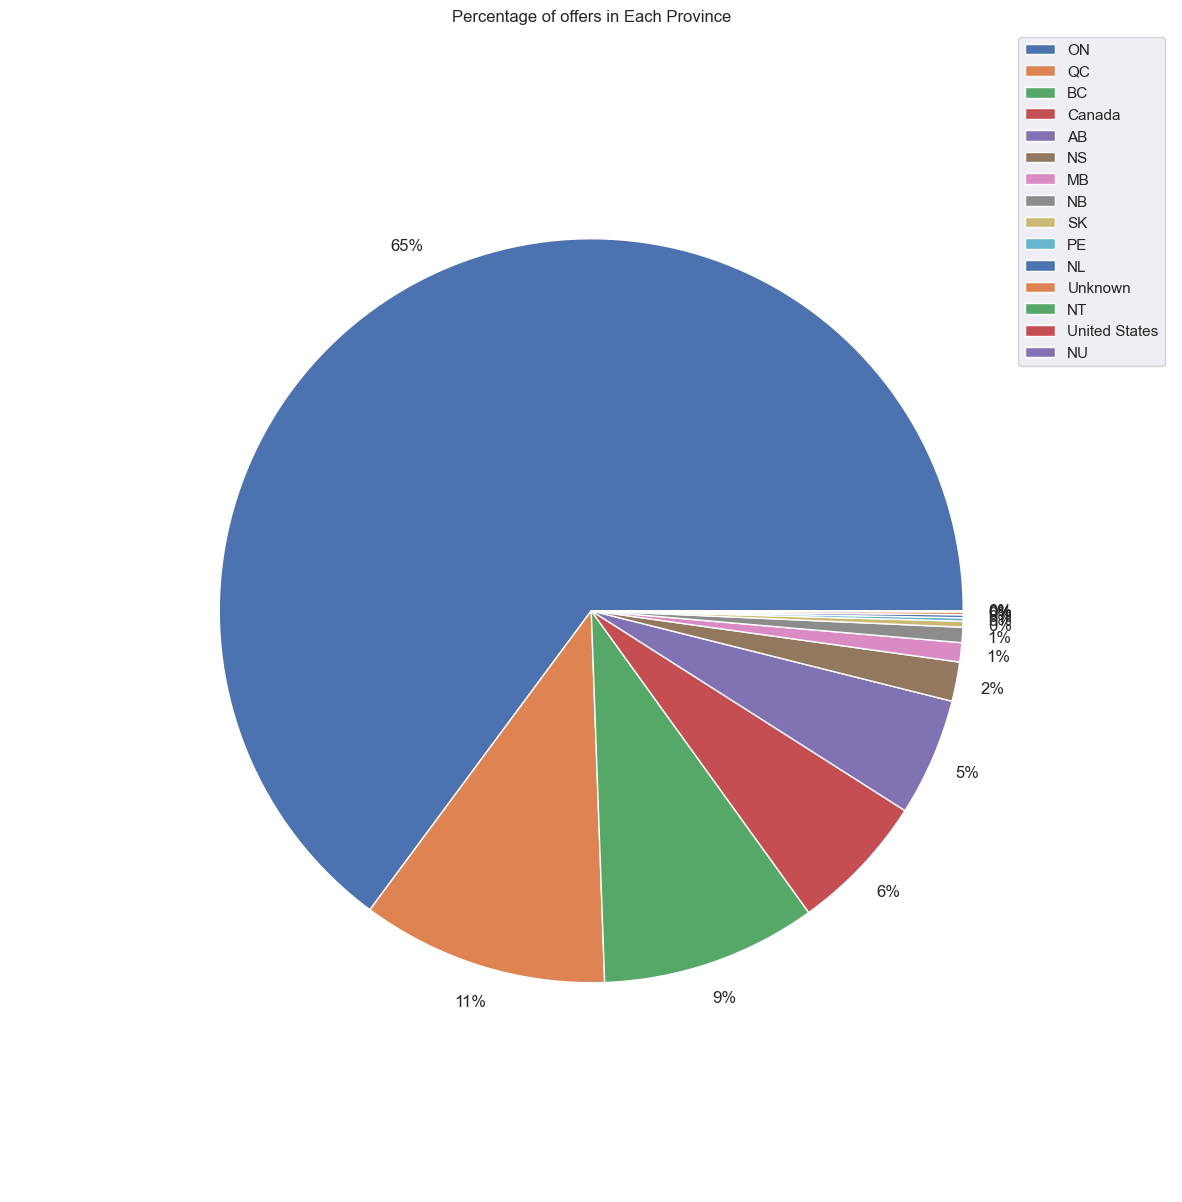

In [78]:
plt.rcParams["figure.figsize"] = (15,20)
piechart = plt.pie(ca["Province"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(ca.index, loc = "upper right")
plt.title("Percentage of offers in Each Province")
plt.show()

## 3.3. Grouped Bar Graphs 

### 3.3.1. Work type in each province

<AxesSubplot:title={'center':'Count of Work Place Type in Each Province'}, xlabel='Province', ylabel='count'>

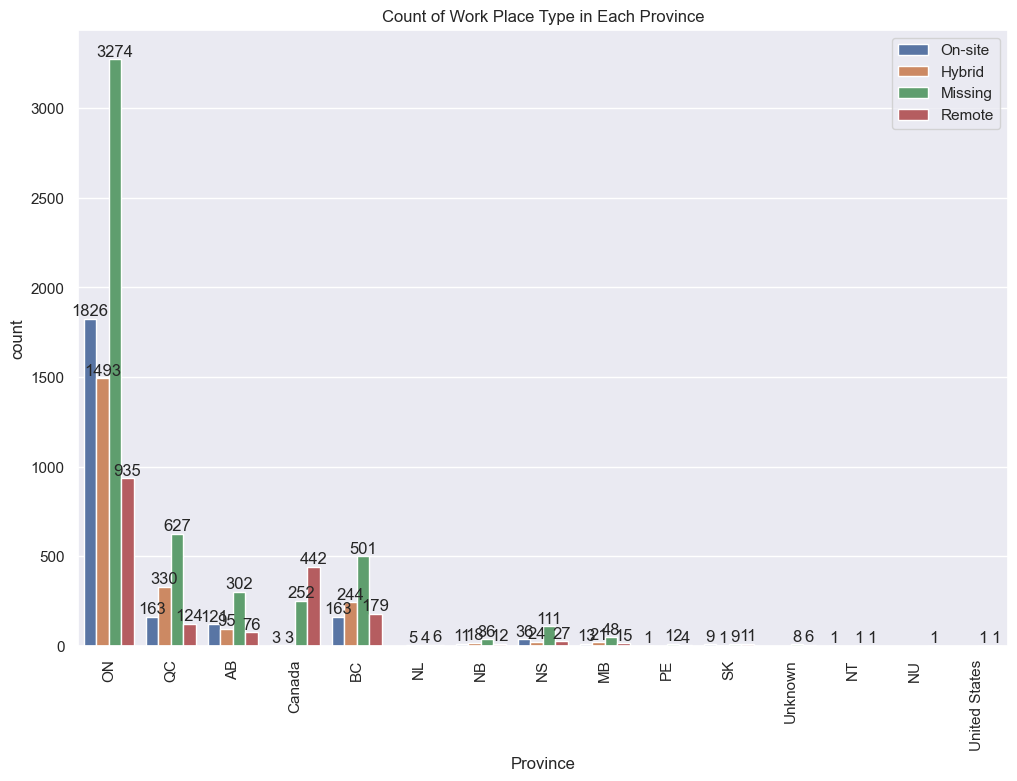

In [79]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(data=sdf, x="Province", hue="Work Place Type")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])
fig.set_title("Count of Work Place Type in Each Province")
fig.legend(loc = "upper right")
fig

### 3.3.2. Job type in each province

<AxesSubplot:title={'center':'Count of Type of Job in Each Province'}, xlabel='Province', ylabel='count'>

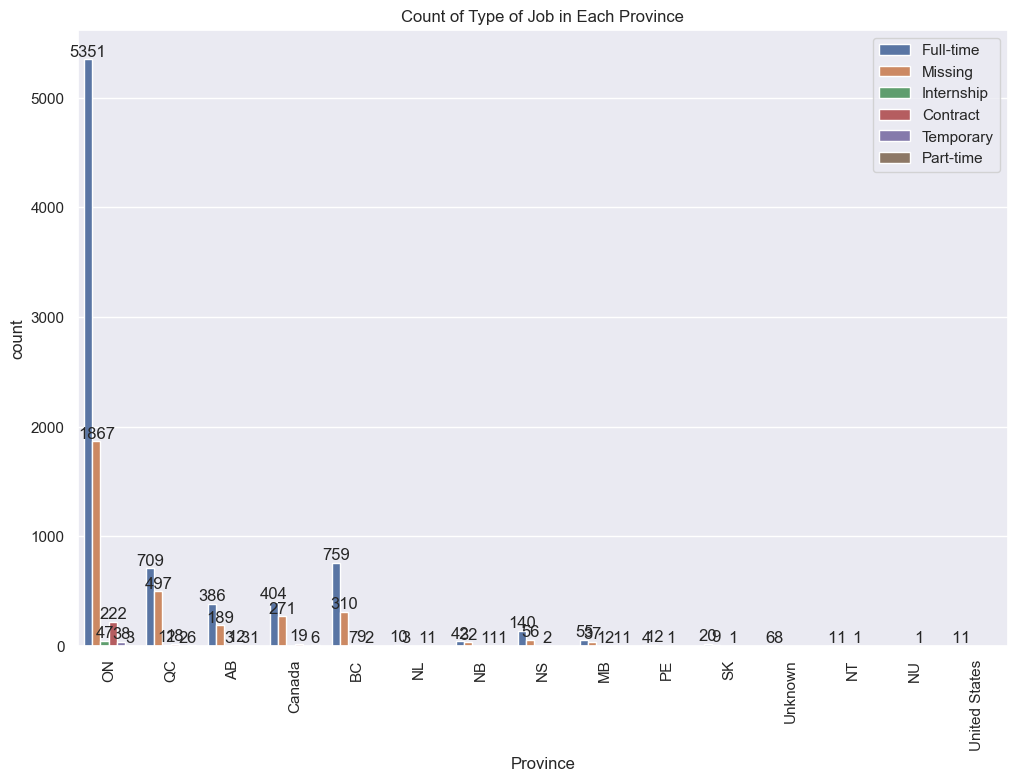

In [80]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(data=sdf, x="Province", hue="Type of Job")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])
fig.set_title("Count of Type of Job in Each Province")
fig.legend(loc = "upper right")
fig

### 3.3.3. Job Level in each province

<AxesSubplot:title={'center':'Count of Type of Position Level in Each Province'}, xlabel='Province', ylabel='count'>

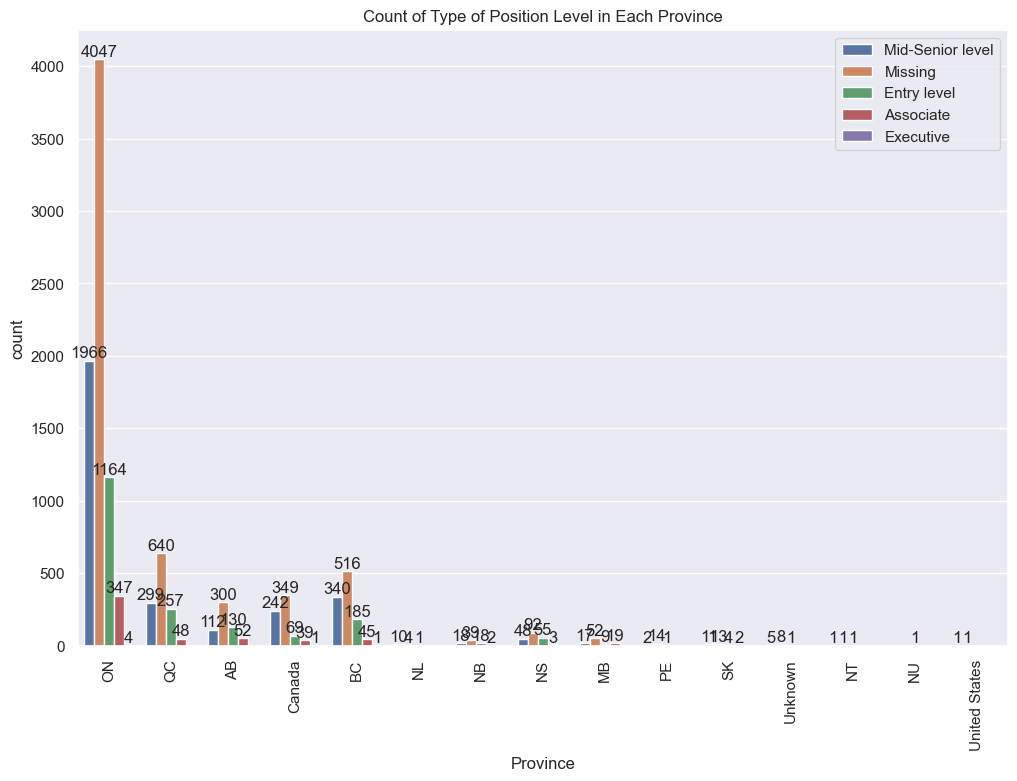

In [81]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(data=sdf, x="Province", hue="Type of Level")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])
fig.set_title("Count of Type of Position Level in Each Province")
fig.legend(loc = "upper right")
fig

### 3.3.4. Work type in job type

<AxesSubplot:title={'center':'Count of Work Place Type for each Job Type'}, xlabel='Work Place Type', ylabel='count'>

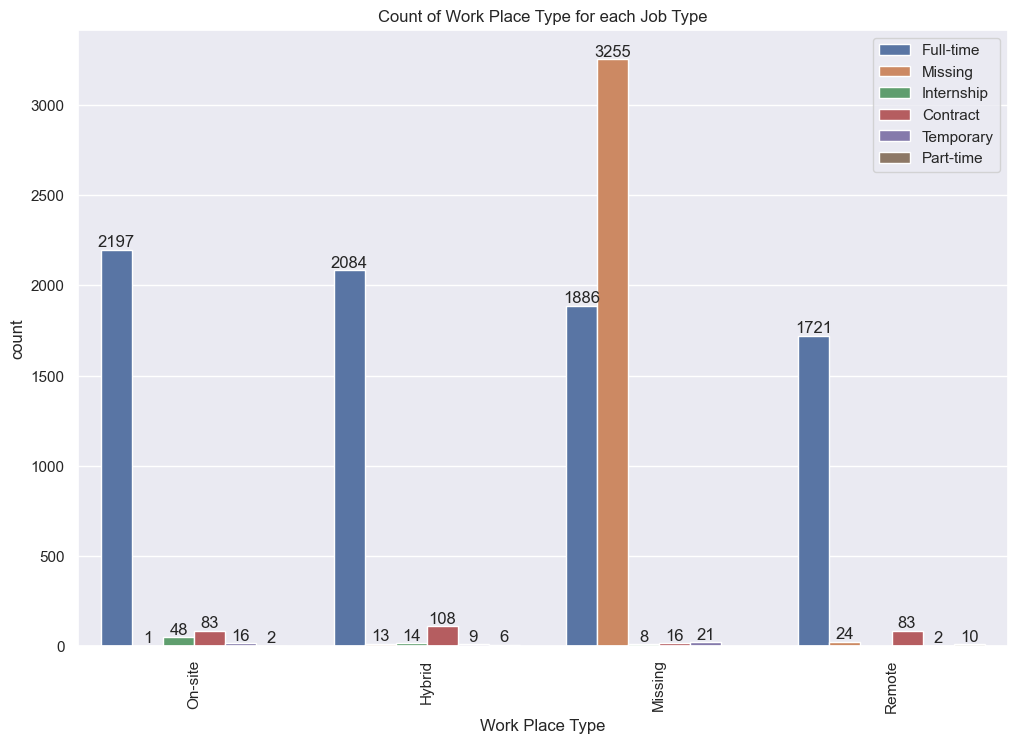

In [82]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(data=sdf, x="Work Place Type", hue="Type of Job")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])
fig.set_title("Count of Work Place Type for each Job Type")
fig.legend(loc = "upper right")
fig

### 3.3.5. Job level in each job type

<AxesSubplot:title={'center':'Count of Type of Job Level for Each Job Type'}, xlabel='Type of Level', ylabel='count'>

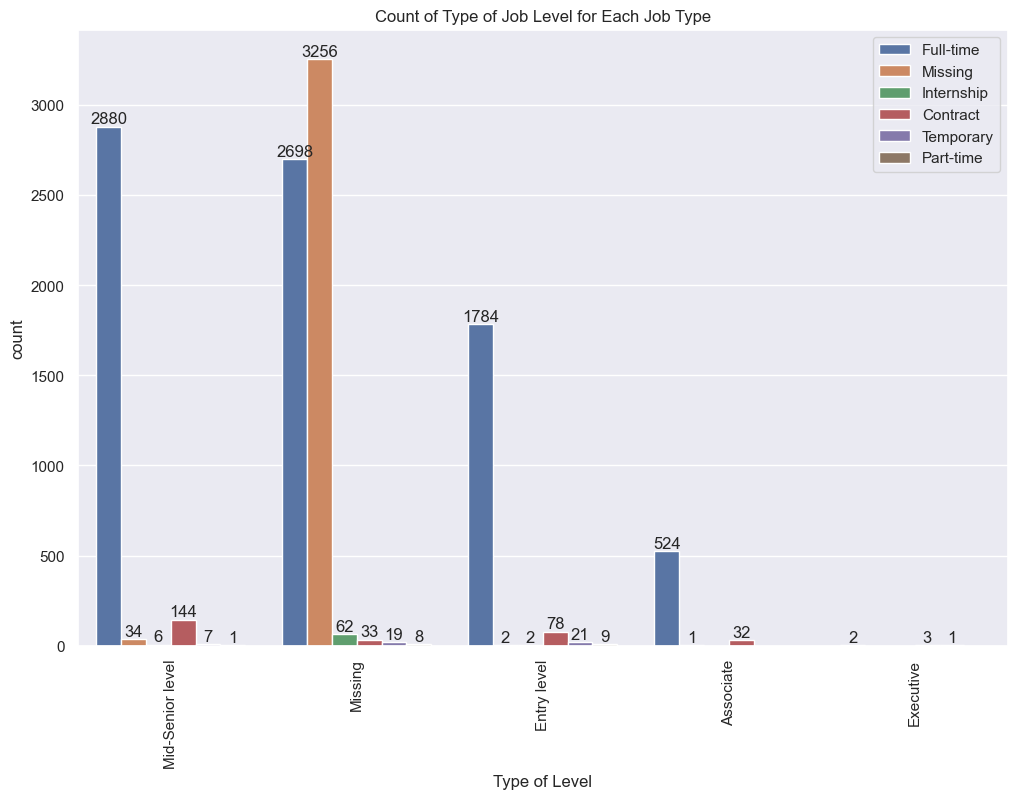

In [83]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(data=sdf, x="Type of Level", hue="Type of Job")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])
fig.set_title("Count of Type of Job Level for Each Job Type")
fig.legend(loc = "upper right")
fig

### 3.3.6. Job level in each work place type

<AxesSubplot:title={'center':'Count of Type of Job level  for Each Work Place Type'}, xlabel='Type of Level', ylabel='count'>

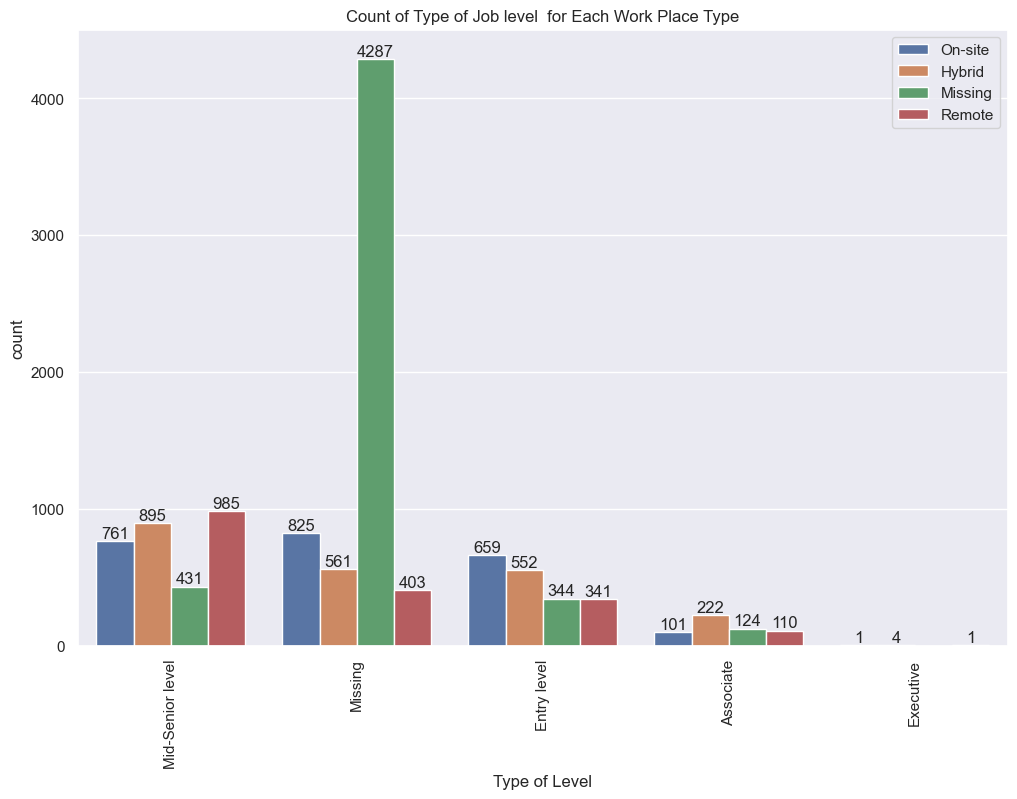

In [84]:
sns.set(rc={'figure.figsize':(12,8)})
fig = sns.countplot(data=sdf, x="Type of Level", hue="Work Place Type")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])
fig.set_title("Count of Type of Job level  for Each Work Place Type")
fig.legend(loc = "upper right")
fig

## 3.4. Relationship plots

### 3.4.1. Total Alumnis vs Applicants for each province

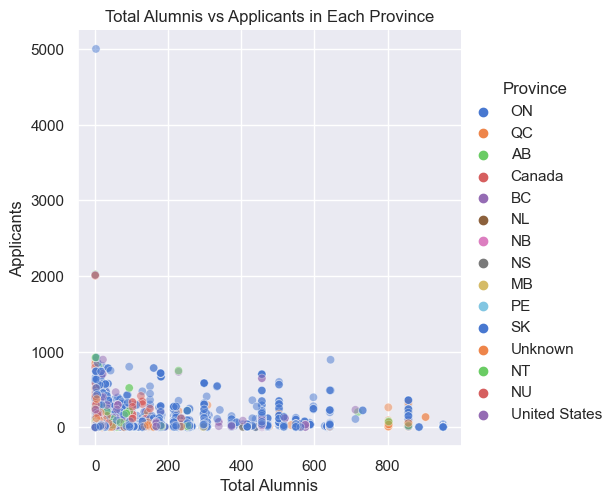

In [85]:
p = sns.relplot(data=sdf, x = "Total Alumnis", y = "Applicants", hue="Province", alpha=.5, palette="muted").set(title="Total Alumnis vs Applicants in Each Province")

### 3.4.2. Total Alumnis vs Applicants for Job Level

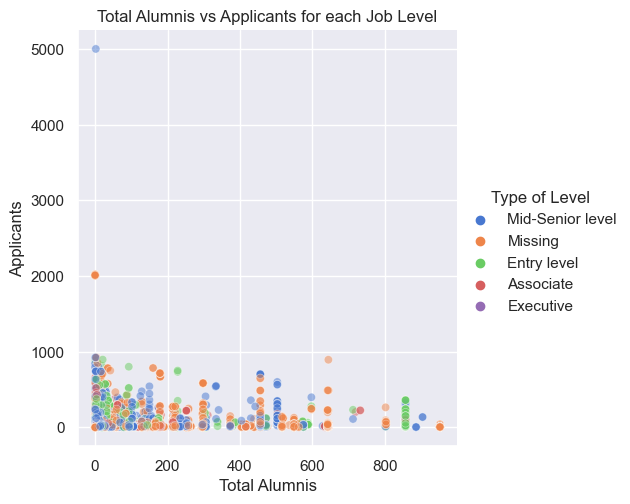

In [86]:
p = sns.relplot(data=sdf, x = "Total Alumnis", y = "Applicants", hue="Type of Level", alpha=.5, palette="muted").set(title="Total Alumnis vs Applicants for each Job Level")

### 3.4.3. Total Alumnis vs Applicants for Job Type

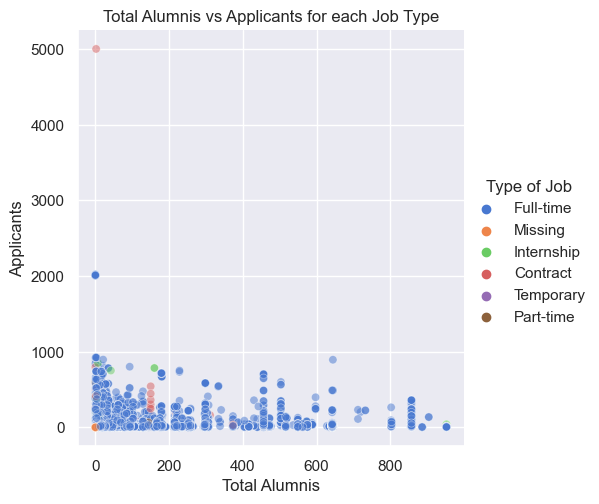

In [87]:
p = sns.relplot(data=sdf, x = "Total Alumnis", y = "Applicants", hue="Type of Job", alpha=.5, palette="muted").set(title="Total Alumnis vs Applicants for each Job Type")

### 3.4.4. Total Alumnis vs Applicants for Work Place Type

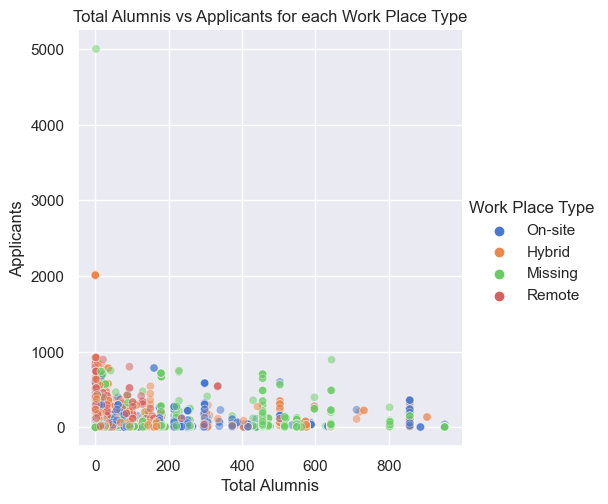

In [88]:
p = sns.relplot(data=sdf, x = "Total Alumnis", y = "Applicants", hue="Work Place Type", alpha=.5, palette="muted").set(title="Total Alumnis vs Applicants for each Work Place Type")

## 4. Clustering

## 4.1 Standardising the dataset

In [89]:
orig_df = sdf.copy()
sdf.head(5)

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,171,203,12,374,ON,Full-time,Mid-Senior level
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,Hybrid,21,25,14,46,QC,Full-time,Mid-Senior level
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,On-site,1,19,5,20,ON,Full-time,Missing
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,Missing,47,175,13,222,ON,Full-time,Missing
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,Missing,47,175,144,222,ON,Full-time,Missing


We need to standardise the dataset except for categorical variables. Categorical variables should never be standardised or centered.

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Extracting numerical columns
sdf.select_dtypes(include="number")

,Company Alumnis,School Alumnis,Applicants,Total Alumnis
0,171,203,12,374
1,21,25,14,46
2,1,19,5,20
3,47,175,13,222
4,47,175,144,222
...,...,...,...,...
11604,0,9,5,9
11605,254,388,38,642
11606,0,0,0,0
11607,0,0,0,0


In [91]:
sdf["Company Alumnis"] = scaler.fit_transform(pd.DataFrame(sdf["Company Alumnis"]))
sdf["School Alumnis"] = scaler.fit_transform(pd.DataFrame(sdf["School Alumnis"]))
sdf["Applicants"] = scaler.fit_transform(pd.DataFrame(sdf["Applicants"]))
sdf["Total Alumnis"] = scaler.fit_transform(pd.DataFrame(sdf["Total Alumnis"]))
sdf.head(20)

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,0.669058,2.265220,-0.329690,1.523608,ON,Full-time,Mid-Senior level
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,Hybrid,-0.279404,0.007322,-0.314524,-0.233643,QC,Full-time,Mid-Senior level
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,On-site,-0.405866,-0.068787,-0.382772,-0.372938,ON,Full-time,Missing
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,Missing,-0.115004,1.910045,-0.322107,0.709272,ON,Full-time,Missing
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,Missing,-0.115004,1.910045,0.671277,0.709272,ON,Full-time,Missing
5,Laserax,Technicien(ne) ingénierie système,Greater Quebec City Metropolitan Area,1 week ago,https://www.linkedin.com/jobs/view/3366638988/...,Missing,-0.412189,-0.309798,-0.420687,-0.480087,QC,Missing,Missing
6,TD,IT Developer III,"Toronto, ON",22 minutes ago,https://www.linkedin.com/jobs/view/3339956921/...,Missing,1.200197,4.624597,-0.223527,2.970125,ON,Full-time,Missing
7,RBC,Senior Site Reliability Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3367214404/...,Missing,1.231812,2.937516,-0.306941,2.284369,ON,Full-time,Missing
8,Mimecast,Senior Site Reliability Engineer,"Mississauga, ON",1 week ago,https://www.linkedin.com/jobs/view/3374474962/...,Hybrid,-0.374251,-0.309798,-0.215944,-0.447942,ON,Full-time,Mid-Senior level
9,Kinaxis,"Staff Cloud Developer, SecOps","Ottawa, ON",1 week ago,https://www.linkedin.com/jobs/view/3373765465/...,Missing,-0.412189,-0.309798,-0.420687,-0.480087,ON,Missing,Missing


## 4.2. Label Encoding the dataset

We will label encode Work Place Type, Province, Type of Job, and Type of Level.

- One hot encoding will be appled to Work Place Type, Type of Job (Nominal variables) and Province
- Label Encoding or encoding manually using dictionary and then mapping for Type of Job Level

In [92]:
#Encoding Work Place Type and Type of Level
enco_sdf = pd.get_dummies(sdf, prefix = ["Encoded_WPT", "Encoded_TOJ","Encoded_Province"], columns=["Work Place Type", "Type of Job","Province"])
enco_sdf

,Company,Title,Location,Post Date,URL,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Type of Level,...,Encoded_Province_NL,Encoded_Province_NS,Encoded_Province_NT,Encoded_Province_NU,Encoded_Province_ON,Encoded_Province_PE,Encoded_Province_QC,Encoded_Province_SK,Encoded_Province_United States,Encoded_Province_Unknown
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,0.669058,2.265220,-0.329690,1.523608,Mid-Senior level,...,0,0,0,0,1,0,0,0,0,0
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,-0.279404,0.007322,-0.314524,-0.233643,Mid-Senior level,...,0,0,0,0,0,0,1,0,0,0
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,-0.405866,-0.068787,-0.382772,-0.372938,Missing,...,0,0,0,0,1,0,0,0,0,0
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,-0.115004,1.910045,-0.322107,0.709272,Missing,...,0,0,0,0,1,0,0,0,0,0
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,-0.115004,1.910045,0.671277,0.709272,Missing,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,IG Wealth Management,Machine Learning Ops Lead- EN,"Ontario, Canada",2 weeks ago,https://www.linkedin.com/jobs/view/3358569107/...,-0.412189,-0.195635,-0.382772,-0.431870,Mid-Senior level,...,0,0,0,0,1,0,0,0,0,0
11605,TD,"Senior Business Insights Analyst, Fraud Strate...","Toronto, ON",8 hours ago,https://www.linkedin.com/jobs/view/3339881098/...,1.193874,4.611912,-0.132530,2.959410,Missing,...,0,0,0,0,1,0,0,0,0,0
11606,Zortech Solutions,Utilities Architect – Oracle,"Mississauga, ON",1 month ago,https://www.linkedin.com/jobs/view/3365684445/...,-0.412189,-0.309798,-0.420687,-0.480087,Missing,...,0,0,0,0,1,0,0,0,0,0
11607,Tiger Analytics,Analytics Consultant (Insurance Analytics) (Ca...,"Toronto, ON",Missing,https://www.linkedin.com/jobs/view/3373059679/...,-0.412189,-0.309798,-0.420687,-0.480087,Missing,...,0,0,0,0,1,0,0,0,0,0


In [93]:
#Unique values in column Type of Level
enco_sdf["Type of Level"].unique()

array(['Mid-Senior level', 'Missing', 'Entry level', 'Associate',
       'Executive'], dtype=object)

In [94]:
#Label Encoding using dictionary for type of job level
job_level_mapper = {"Missing":0, "Entry level":1, "Associate":2, "Mid-Senior level":3, "Executive":4}
enco_sdf["Type of Level"].replace(job_level_mapper, inplace=True)
enco_sdf.head(10)

,Company,Title,Location,Post Date,URL,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Type of Level,...,Encoded_Province_NL,Encoded_Province_NS,Encoded_Province_NT,Encoded_Province_NU,Encoded_Province_ON,Encoded_Province_PE,Encoded_Province_QC,Encoded_Province_SK,Encoded_Province_United States,Encoded_Province_Unknown
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,0.669058,2.265220,-0.329690,1.523608,3,...,0,0,0,0,1,0,0,0,0,0
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,-0.279404,0.007322,-0.314524,-0.233643,3,...,0,0,0,0,0,0,1,0,0,0
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,-0.405866,-0.068787,-0.382772,-0.372938,0,...,0,0,0,0,1,0,0,0,0,0
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,-0.115004,1.910045,-0.322107,0.709272,0,...,0,0,0,0,1,0,0,0,0,0
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,-0.115004,1.910045,0.671277,0.709272,0,...,0,0,0,0,1,0,0,0,0,0
5,Laserax,Technicien(ne) ingénierie système,Greater Quebec City Metropolitan Area,1 week ago,https://www.linkedin.com/jobs/view/3366638988/...,-0.412189,-0.309798,-0.420687,-0.480087,0,...,0,0,0,0,0,0,1,0,0,0
6,TD,IT Developer III,"Toronto, ON",22 minutes ago,https://www.linkedin.com/jobs/view/3339956921/...,1.200197,4.624597,-0.223527,2.970125,0,...,0,0,0,0,1,0,0,0,0,0
7,RBC,Senior Site Reliability Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3367214404/...,1.231812,2.937516,-0.306941,2.284369,0,...,0,0,0,0,1,0,0,0,0,0
8,Mimecast,Senior Site Reliability Engineer,"Mississauga, ON",1 week ago,https://www.linkedin.com/jobs/view/3374474962/...,-0.374251,-0.309798,-0.215944,-0.447942,3,...,0,0,0,0,1,0,0,0,0,0
9,Kinaxis,"Staff Cloud Developer, SecOps","Ottawa, ON",1 week ago,https://www.linkedin.com/jobs/view/3373765465/...,-0.412189,-0.309798,-0.420687,-0.480087,0,...,0,0,0,0,1,0,0,0,0,0


### 4.2.1 KMeans Clustering 

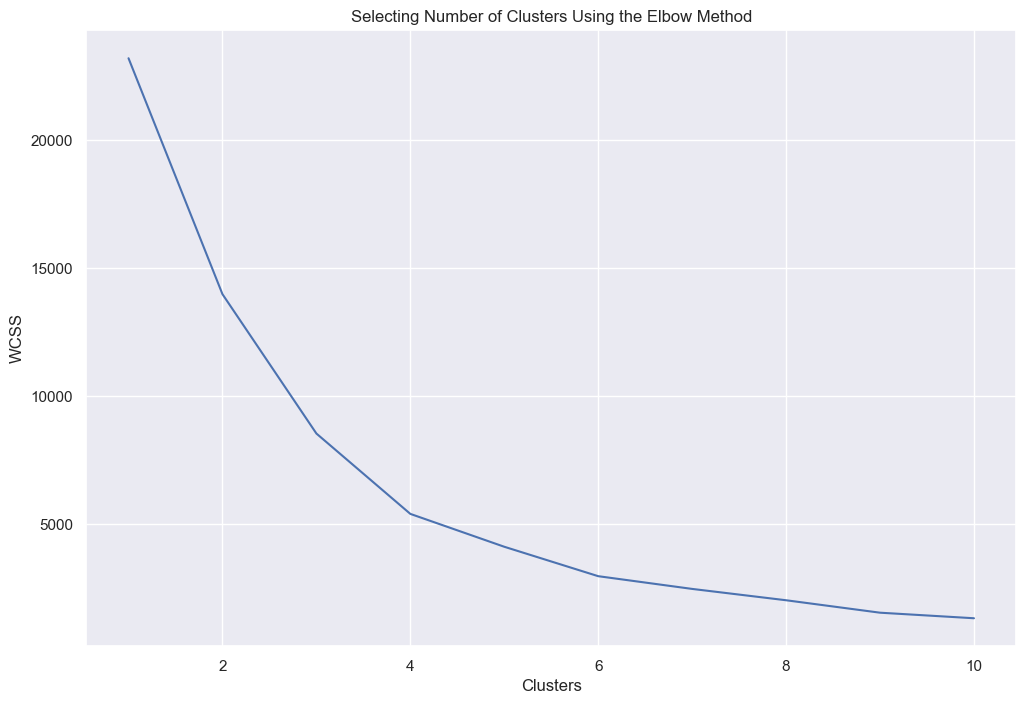

In [101]:
from sklearn.cluster import KMeans

X = enco_sdf[["Total Alumnis", "Applicants"]]

#Finding K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#Plotting graph
plt.plot(range(1, 11), wcss)
plt.title("Selecting Number of Clusters Using the Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

From the graph, we can select K as 3 since the elbow of the curve appears there.

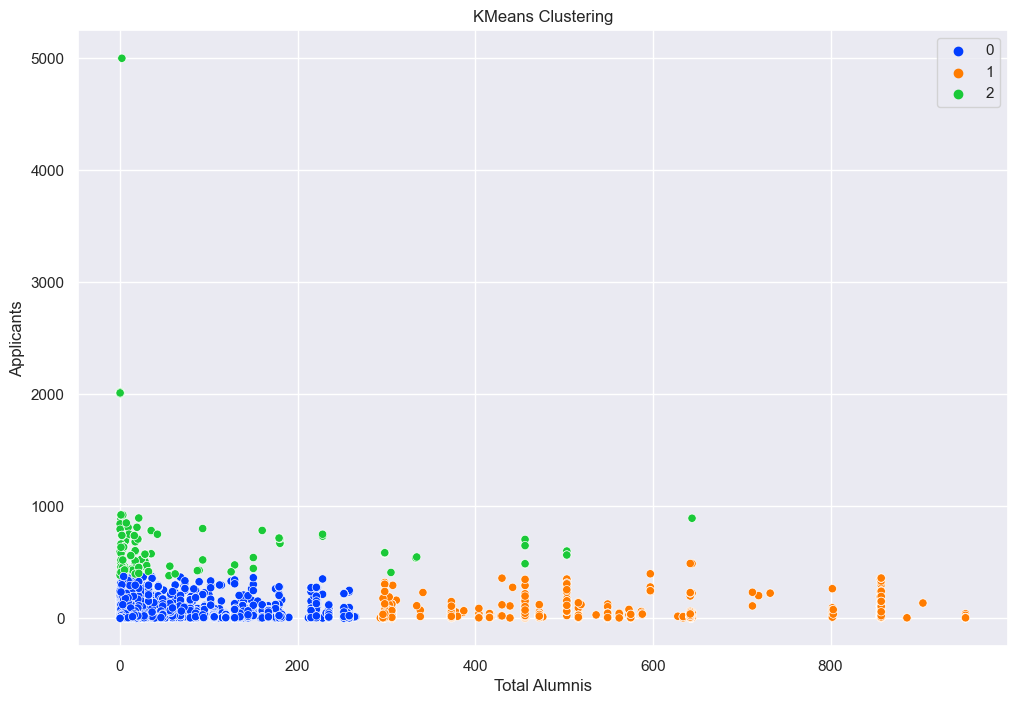

In [102]:
#Fit and predicting using n as 3 for Kmeans
kmeans_data = orig_df.copy()
kmeans = KMeans(n_clusters = 3, random_state = 0)
g = kmeans.fit_predict(X)
kmeans_data["Group"] = g

#Plotting the grouped data points
plt.close()
sns.scatterplot(x=kmeans_data["Total Alumnis"], y=kmeans_data["Applicants"], hue=kmeans_data["Group"], palette="bright").set(title="KMeans Clustering")
plt.legend()

In [103]:
kmeans_data.head(10)

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level,Group
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,171,203,12,374,ON,Full-time,Mid-Senior level,1
1,Intact,Backend Java Developer (Senior/Intermediate),"Québec, QC",1 week ago,https://www.linkedin.com/jobs/view/3373849968/...,Hybrid,21,25,14,46,QC,Full-time,Mid-Senior level,0
2,Citi,Low Latency Java Engineer,"Mississauga, ON",16 hours ago,https://www.linkedin.com/jobs/view/3350318652/...,On-site,1,19,5,20,ON,Full-time,Missing,0
3,Rogers Communications,Senior Software Engineer,"Brampton, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3358772299/...,Missing,47,175,13,222,ON,Full-time,Missing,0
4,Rogers Communications,Software Developer Intern,"Markham, ON",2 days ago,https://www.linkedin.com/jobs/view/3376738513/...,Missing,47,175,144,222,ON,Full-time,Missing,0
5,Laserax,Technicien(ne) ingénierie système,Greater Quebec City Metropolitan Area,1 week ago,https://www.linkedin.com/jobs/view/3366638988/...,Missing,0,0,0,0,QC,Missing,Missing,0
6,TD,IT Developer III,"Toronto, ON",22 minutes ago,https://www.linkedin.com/jobs/view/3339956921/...,Missing,255,389,26,644,ON,Full-time,Missing,1
7,RBC,Senior Site Reliability Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3367214404/...,Missing,260,256,15,516,ON,Full-time,Missing,1
8,Mimecast,Senior Site Reliability Engineer,"Mississauga, ON",1 week ago,https://www.linkedin.com/jobs/view/3374474962/...,Hybrid,6,0,27,6,ON,Full-time,Mid-Senior level,0
9,Kinaxis,"Staff Cloud Developer, SecOps","Ottawa, ON",1 week ago,https://www.linkedin.com/jobs/view/3373765465/...,Missing,0,0,0,0,ON,Missing,Missing,0


Four groups identified by the clusters are,
- 0: This group contains low number of alumnis and low number of applicants
- 1: This group contains higher number of alumnis compared to group 0 and less number of applicants compared to group 2. Jobs falling under this group will be the ideal choice to apply.
- 2: This group contains comparitively low number of alumnis and very high number of applicants

Group 1 will be the ideal choice to apply for compared to other groups.

Job offers which fall under the category of GRoup 1 are as follows.

In [104]:
kmeans_data[kmeans_data["Group"]==1]

,Company,Title,Location,Post Date,URL,Work Place Type,Company Alumnis,School Alumnis,Applicants,Total Alumnis,Province,Type of Job,Type of Level,Group
0,Scotiabank,"Senior Cloud Engineer, Scotia Digital (Vancouv...","Toronto, ON",2 weeks ago,https://www.linkedin.com/jobs/view/3326598427/...,On-site,171,203,12,374,ON,Full-time,Mid-Senior level,1
6,TD,IT Developer III,"Toronto, ON",22 minutes ago,https://www.linkedin.com/jobs/view/3339956921/...,Missing,255,389,26,644,ON,Full-time,Missing,1
7,RBC,Senior Site Reliability Engineer,"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3367214404/...,Missing,260,256,15,516,ON,Full-time,Missing,1
13,CGI,JAVA + AWS (Cloud Developer),"Toronto, ON",1 week ago,https://www.linkedin.com/jobs/view/3236613821/...,On-site,814,42,106,856,ON,Full-time,Entry level,1
20,CIBC,Senior Cloud Engineer,"Toronto, ON",6 days ago,https://www.linkedin.com/jobs/view/3371168098/...,Missing,125,347,25,472,ON,Full-time,Mid-Senior level,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11574,TD,Senior Business Insights Analyst- EN,"Toronto, ON",8 hours ago,https://www.linkedin.com/jobs/view/3339877358/...,Missing,254,388,40,642,ON,Full-time,Missing,1
11575,TD,Senior Business Insights Analyst- EN,"Toronto, ON",16 hours ago,https://www.linkedin.com/jobs/view/3339874684/...,Missing,254,388,52,642,ON,Full-time,Missing,1
11593,TD,Senior Business Insights Analyst- EN,"Markham, ON",8 hours ago,https://www.linkedin.com/jobs/view/3339880201/...,Missing,254,388,27,642,ON,Full-time,Missing,1
11594,TD,Senior Business Insights Analyst- EN,"Markham, ON",14 hours ago,https://www.linkedin.com/jobs/view/3339875668/...,Missing,254,388,42,642,ON,Full-time,Missing,1


There are 1433 offers in group 1.

### Evaluating KMeans model

In [105]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# from jqmcvi import base


print("The Silhouette score of the Kmeans model is:")
print(silhouette_score(X, g))
print("The Davies Bouldin Score of the Kmeans model is:")
print(davies_bouldin_score(X, g))
# print("The Dunns Index of the Kmeans model is:")
# clus0 = kmeans_data.loc[kmeans_data.Group == 0]
# clus1 = kmeans_data.loc[kmeans_data.Group == 1]
# clus2 = kmeans_data.loc[kmeans_data.Group == 2]
# cluster_list = [clus0.values, clus1.values, clus2.values]

# print(base.dunn(cluster_list))

The Silhouette score of the Kmeans model is:
0.7387225441463818
The Davies Bouldin Score of the Kmeans model is:
0.5858009342673879


Another approach is to manually check the grouped links

In [ ]:
kmeans_data[kmeans_data["Group"] == 1]

### Taking 3 Features instead of two

We will do clustering using Company Alumnis, School Alumnis, and Applicants.


In [ ]:
X = enco_sdf[["Company Alumnis", "School Alumnis", "Applicants"]]

#Finding K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#Plotting graph
plt.close()
plt.plot(range(1, 11), wcss)
plt.title("Selecting Number of Clusters Using the Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

We can say n value should be 5

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#Fit and predicting using n as 5 for Kmeans
kmeans_data = orig_df.copy()
kmeans = KMeans(n_clusters = 5, random_state = 0)
g = kmeans.fit_predict(X)
kmeans_data["Group"] = g

#Plotting the grouped data points
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

zero_kmeans_data = kmeans_data[kmeans_data["Group"]==0]
one_kmeans_data = kmeans_data[kmeans_data["Group"]==1]
two_kmeans_data = kmeans_data[kmeans_data["Group"]==2]
three_kmeans_data = kmeans_data[kmeans_data["Group"]==3]
four_kmeans_data = kmeans_data[kmeans_data["Group"]==4]

# x = kmeans_data["Company Alumnis"]
# y = kmeans_data["School Alumnis"]
# z = kmeans_data["Applicants"]

ax.set_xlabel("Company Alumnis")
ax.set_ylabel("School Alumnis")
ax.set_zlabel("Applicants")

ax.scatter(zero_kmeans_data["Company Alumnis"], zero_kmeans_data["School Alumnis"], zero_kmeans_data["Applicants"], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(one_kmeans_data["Company Alumnis"], one_kmeans_data["School Alumnis"], one_kmeans_data["Applicants"], s = 40 , color = 'green', label = "cluster 0")
ax.scatter(two_kmeans_data["Company Alumnis"], two_kmeans_data["School Alumnis"], two_kmeans_data["Applicants"], s = 40 , color = 'orange', label = "cluster 0")
ax.scatter(three_kmeans_data["Company Alumnis"], three_kmeans_data["School Alumnis"], three_kmeans_data["Applicants"], s = 40 , color = 'yellow', label = "cluster 0")
ax.scatter(four_kmeans_data["Company Alumnis"], four_kmeans_data["School Alumnis"], four_kmeans_data["Applicants"], s = 40 , color = 'yellow', label = "cluster 0")





# ax.scatter(x, y, z)

# sns.scatterplot(x, y, z, hue=kmeans_data["Group"], palette="bright").set(title="KMeans Clustering Using 3 Features")
# plt.legend()

In [ ]:
print("The Silhouette score of the Kmeans model is:")
print(silhouette_score(X, g))
print("The Davies Bouldin Score of the Kmeans model is:")
print(davies_bouldin_score(X, g))

## 4.2.2. GMM

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_sdf = orig_df.copy()
X = gmm_sdf[["Total Alumnis", "Applicants"]]
#Clustering for different values of n
for i in range(2,20):
    gmm_cluster_model = GaussianMixture(n_components=i)
    g = gmm_cluster_model.fit_predict(X)
    print(f"Number of clusters {i}")
    print("The Silhouette score of the Spectral Clustering model is:")
    print(silhouette_score(X, g))
    print("The Davies Bouldin Score of the Spectral Clustering model is:")
    print(davies_bouldin_score(X, g))
    print("------------------------------------------------------------------")


In [ ]:
gmm_cluster_model = GaussianMixture(n_components=11)
g = gmm_cluster_model.fit_predict(X)
#Adding the result to dataframe
gmm_sdf["Group"] = g
#Plotting
sns.scatterplot(x=gmm_sdf["Total Alumnis"], y=gmm_sdf["Applicants"], hue=gmm_sdf["Group"], palette="Paired").set(title="GMM Clustering")
plt.legend()
plt.show()

### Evaluation

In [ ]:
print("The Silhouette score of the GMM model is:")
print(silhouette_score(X, g))
print("The Davies Bouldin Score of the GMM model is:")
print(davies_bouldin_score(X, g))

In [ ]:
gmm_sdf[gmm_sdf["Group"]==4]

# 4.2.3. DBSCAN

We need to find the optimal values for the min_samples and epsilon. It is calculated with the help of NearestNeighbours.

In [ ]:
%matplotlib widget

In [ ]:
from sklearn.neighbors import NearestNeighbors

DBSCAN_sdf = orig_df.copy()
X = DBSCAN_sdf[["Total Alumnis", "Applicants"]]

#finding epsilon value
plt.close()
plt.figure(figsize=(10,8))
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title("Epsilon Value")
plt.plot(distances)

By Zooming into the graph, its clear that the epsilon value lies between 10 and 30. On further trials, its found the best result is obtained if eps value 25. As for the minimum samples, by doing a lot of trial and error, best minimum sample size is found to be 20, using the below code.

In [ ]:
from sklearn.cluster import DBSCAN

# define the model
#Loop through the values 10 to 30 for epsilon
for i in range(10,30):
    dbscan_model = DBSCAN(eps=i, min_samples=20)
    g = dbscan_model.fit_predict(X)
    DBSCAN_sdf["Group"] = g
    print(f"Value of eps is {i}")
    print("The Silhouette score of the DBSCAN model is:")
    print(silhouette_score(X, g))
    print("The Davies Bouldin Score of the DBSCAN model is:")
    print(davies_bouldin_score(X, g))
    print("-----------------------------------------------------------")
    

In [ ]:
dbscan_model = DBSCAN(eps=25, min_samples=20)
g = dbscan_model.fit_predict(X)
DBSCAN_sdf["Group"] = g

plt.close()
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.scatterplot(x=DBSCAN_sdf["Total Alumnis"], y=DBSCAN_sdf["Applicants"], hue=DBSCAN_sdf["Group"], palette="bright").set(title="DBSCAN Clustering")
plt.legend()
plt.show()

#Evaluation
print("The Silhouette score of the DBSCAN model is:")
print(silhouette_score(X, g))
print("The Davies Bouldin Score of the DBSCAN model is:")
print(davies_bouldin_score(X, g))
print("-----------------------------------------------------------")



In [ ]:
DBSCAN_sdf[DBSCAN_sdf["Group"]==6].shape

## 4.2.4.  Mean Shift

In [ ]:
from sklearn.cluster import MeanShift
import colorcet as cc
#For more range of colors
pal = sns.color_palette("Spectral", as_cmap=True, n_colors = 13)
ms_sdf = orig_df.copy()
X = ms_sdf[["Total Alumnis", "Applicants"]]

# define the model
mean_model = MeanShift()

# assign each data point to a cluster

g = mean_model.fit_predict(X)
#Adding the result to dataframe
ms_sdf["Group"] = g
plt.close()
sns.scatterplot(x=ms_sdf["Total Alumnis"], y=ms_sdf["Applicants"], hue=ms_sdf["Group"], palette="Paired").set(title="Mean Shift Clustering")
plt.legend()
plt.show()

#Evaluation

print("The Silhouette score of the Mean Shift model is:")
print(silhouette_score(X, g))
print("The Davies Bouldin Score of the Mean Shift model is:")
print(davies_bouldin_score(X, g))
print("-----------------------------------------------------------")

In [ ]:
ms_sdf[ms_sdf["Group"]==3]

## 4.2.5. Spectral Clustering 

In [ ]:
from sklearn.cluster import SpectralClustering

spec_sdf = orig_df.copy()
X = spec_sdf[["Total Alumnis", "Applicants"]]
#Clustering for different values of n
for i in range(2,15):
    spectral_cluster_model = SpectralClustering(n_clusters=i, random_state=0, n_neighbors=20, affinity='nearest_neighbors')
    g = spectral_cluster_model.fit_predict(X)
    print(f"Number of clusters {i}")
    print("The Silhouette score of the Spectral Clustering model is:")
    print(silhouette_score(X, g))
    print("The Davies Bouldin Score of the Spectral Clustering model is:")
    print(davies_bouldin_score(X, g))
    print("------------------------------------------------------------------")

In [ ]:
spectral_cluster_model = SpectralClustering(n_clusters=2, random_state=0, n_neighbors=30, affinity='nearest_neighbors')
g = spectral_cluster_model.fit_predict(X)
#Adding the result to dataframe

spec_sdf["Group"] = g

#Plotting
plt.close()
sns.scatterplot(x=spec_sdf["Total Alumnis"], y=spec_sdf["Applicants"], hue=spec_sdf["Group"], palette="bright").set(title="Spectral Clustering where n_clusters=2")
plt.legend()
plt.show()

#Evaluation
print("The Silhouette score of the Spectral CLustering model is:")
print(silhouette_score(X, g))
print("The Davies Bouldin Score of the Spectral Clustering model is:")
print(davies_bouldin_score(X, g))
print("-----------------------------------------------------------")

In [ ]:
spec_sdf[spec_sdf["Group"]==1].shape